## Importando as bibliotecas e funções usadas

In [1]:
# Bibliotecas para manipular os dados
import pandas as pd
import numpy as np

# Bibliotecas para fazer o RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from scipy.stats import randint

# Bibliotecas para Hyperparameter tuning e visualizar a performance
from sklearn.metrics import confusion_matrix, precision_score, ConfusionMatrixDisplay, accuracy_score, recall_score, f1_score

# Bibliotecas para ver o modelo gerado
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

## Recebendo o Dataset

In [2]:
data = pd.read_csv('dataset/Cancer_Data.csv')

# Separando as instâncias das suas classificações
values = data.drop('id', axis=1).drop('diagnosis', axis=1).drop('Unnamed: 32', axis=1)
labels = data['diagnosis']

In [3]:
values.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [4]:
labels.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

## Normalizando o dataset

In [5]:
#Normalizando os valores antes de realizar o treino
values = (values - np.mean(values, axis=0)) / np.std(values, axis=0)

values.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                2.255747  ...      1.886690      -1.359293         2.303601   
1               -0.868652  ...      1.805927      -0.369203         1.535126   
2               -0.398008  ...      1.511870      -0.023974         1.347475   
3                4.910919  ...     -0.281464       0.133984        -0.249939   
4               -0.562450  ...      1.298575      -1.466770         1.338539   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0    2.001237          1.307686           2.616665         2.109526   
1    1.890489         -0.375612          -0.430444        -0.146749   
2    1.456285          0.527407           1.082932         0.854974   
3   -0.550021          3.394275           3.893397         1.989588   
4    1.220724          0.220556          -0.313395         0.613179   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0              2.296076        2.750622                 1.937015  
1              1.087084       -0.243890                 0.281190  
2              1.955000        1.152255                 0.201391  
3              2.175786        6.046041                 4.935010  
4              0.729259       -0.868353                -0.397100  

[5 rows x 30 columns]

## Separando as instâncias em um conjunto de treinamento e um de teste

In [6]:
values_train, values_test, labels_train, labels_test = train_test_split(values, labels, test_size=0.3, random_state=123)

## Escolhendo os melhores parâmetros

O que cada parâmetro indica:

*   **n_estimators**: Define a quantidade de árvores que a Random Forest terá
*   **criterion**: Define as métricas para avaliação da qualidade da divisão dos nós da árvore: gini, entropy ou log loss.
*   **max_features**: Define o número máximo de variáveis que são considerados para cada divisão de nó. A opção "sqrt" define o número de variáveis a ser considerado como a raiz quadrada do número total de variáveis, enquanto "log2" define o número de variáveis a ser considerado como o logaritmo de base 2 do número total de variáveis. A opção "None" indica que todos os variáveis devem ser considerados.
*   **max_depth**: Define a profundidade máxima da árvore.

In [7]:
param_dist = {'n_estimators': range(10, 100),
              'criterion': ['gini', 'entropy', 'log_loss'],
              'max_features': ['sqrt', 'log2'],
              'max_depth': range(1, 20)
            }

rf = RandomForestClassifier()
rand_search = RandomizedSearchCV(rf, param_distributions=param_dist, cv=5)
rand_search.fit(values_train, labels_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': range(1, 20),
                                        'max_features': ['sqrt', 'log2'],
                                        'n_estimators': range(10, 100)})

In [8]:
top5_modelos = pd.DataFrame(rand_search.cv_results_)
top5_modelos = top5_modelos.sort_values(by='mean_test_score', ascending=False)
top5_modelos = top5_modelos.head()
top5_modelos = top5_modelos.loc[:, ['params', 'mean_test_score']]
top5_modelos

params  mean_test_score
5  {'n_estimators': 17, 'max_features': 'log2', '...         0.964778
2  {'n_estimators': 70, 'max_features': 'log2', '...         0.959715
0  {'n_estimators': 68, 'max_features': 'sqrt', '...         0.957215
7  {'n_estimators': 86, 'max_features': 'log2', '...         0.954715
8  {'n_estimators': 28, 'max_features': 'log2', '...         0.952278

Com isso, nota-se que apesar de não haver muita diferença entre eles, o primeiro modelo ainda possui a melhor média do cross-validation, sendo o nosso modelo escolhido

## Avaliando a performance do modelo com os parâmetros escolhidos com outras métricas de avaliação

Para avaliar a performance do nosso modelo, iremos usar a acurâcia, a precisão, o recall, o F1-score, a média do cross-validation e a matriz de confusão para avaliar o quão bem o nosso modelo classifica o nosso conjunto de teste.

Considerando a seguinte legenda:
* **TP** = True Positive, ou seja, as instâncias positivas que foram corretamente classificadas como positivas
* **TN** = True Negative, ou seja, as instâncias negativas que foram corretamente classificadas como negativas
* **FP** = False Positive, ou seja, as instâncias negativas que foram classificadas como positivas
* **FN** = False Negative, ou seja, as instâncias positivas que foram classificadas como negativas

Temos que:
* **Acurâcia**: Mede a proporção de instâncias que são classificadas corretamente, ou seja, é a quantidade de instâncias classificadas corretamente dividido pela quantidade total de instâncias no conjunto de testes, sendo calculada como (TP + TN) / (TP + TN + FP + FN)
* **Precisão**: Mede a proporção de instâncias que foram corretamente classificadas como positivas, ou seja, é a quantidade de instâncias positivas classificadas como positivas dividido pela quantidade de instâncias que foram classificadas como positivas, sendo calculado como TP / (TP + FP)
* **Recall**: Mede a proporção de instâncias positivas que são classificadas como positivas, sendo calculado como TP / (TP + FN)
* **F1-Score**: É a média harmônica da precisão e do recall, sendo calculada como 2 * (precisão * recall) / (precisão + recall)

Modelo 0:
Parametros: {'n_estimators': 17, 'max_features': 'log2', 'max_depth': 13, 'criterion': 'entropy'}
Média do cross-validation do teste: 0.9768067226890758
Acurâcia do teste: 0.9824561403508771
Precisão do teste: 0.9807692307692307
Sensibilidade (recall) do teste: 0.9902912621359223
F1-Score do teste: 0.9855072463768114



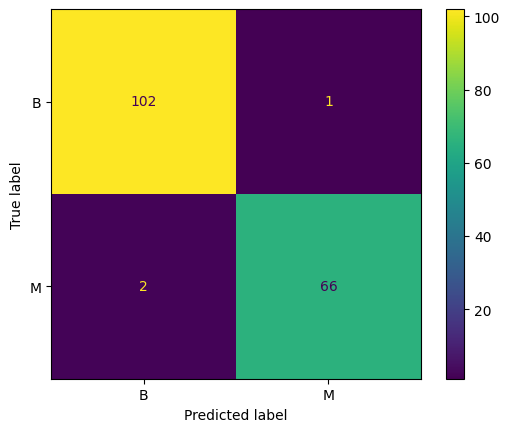

Modelo 1:
Parametros: {'n_estimators': 70, 'max_features': 'log2', 'max_depth': 11, 'criterion': 'gini'}
Média do cross-validation do teste: 0.9710924369747899
Acurâcia do teste: 0.9824561403508771
Precisão do teste: 0.9807692307692307
Sensibilidade (recall) do teste: 0.9902912621359223
F1-Score do teste: 0.9855072463768114



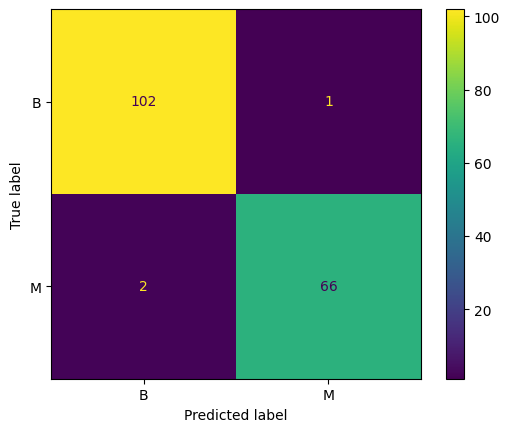

Modelo 2:
Parametros: {'n_estimators': 68, 'max_features': 'sqrt', 'max_depth': 14, 'criterion': 'log_loss'}
Média do cross-validation do teste: 0.9709243697478991
Acurâcia do teste: 0.9824561403508771
Precisão do teste: 0.9807692307692307
Sensibilidade (recall) do teste: 0.9902912621359223
F1-Score do teste: 0.9855072463768114



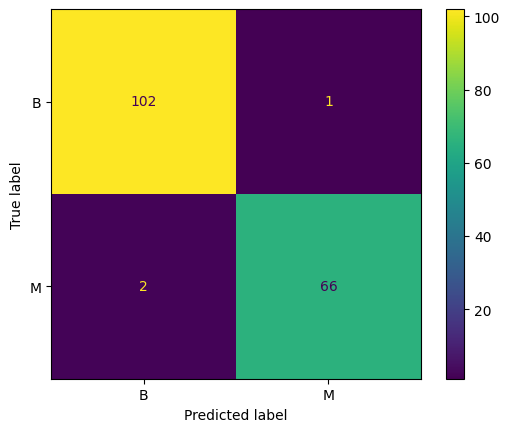

Modelo 3:
Parametros: {'n_estimators': 86, 'max_features': 'log2', 'max_depth': 8, 'criterion': 'gini'}
Média do cross-validation do teste: 0.9710924369747899
Acurâcia do teste: 0.9824561403508771
Precisão do teste: 0.9807692307692307
Sensibilidade (recall) do teste: 0.9902912621359223
F1-Score do teste: 0.9855072463768114



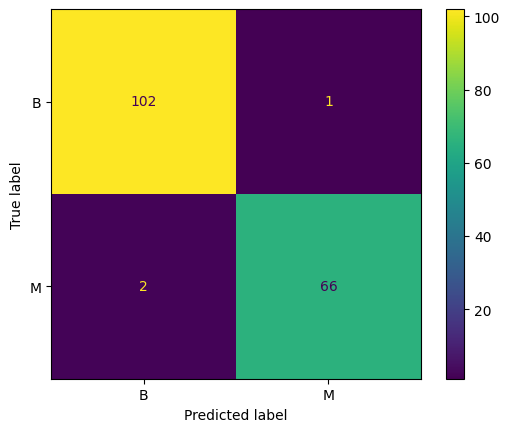

Modelo 4:
Parametros: {'n_estimators': 28, 'max_features': 'log2', 'max_depth': 6, 'criterion': 'entropy'}
Média do cross-validation do teste: 0.9710924369747899
Acurâcia do teste: 0.9766081871345029
Precisão do teste: 0.9714285714285714
Sensibilidade (recall) do teste: 0.9902912621359223
F1-Score do teste: 0.9807692307692307



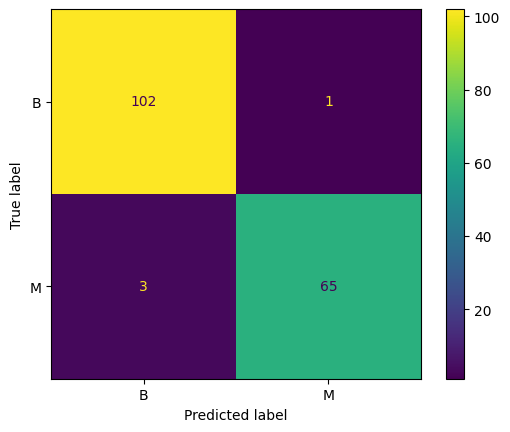

In [15]:
for i, params in enumerate(top5_modelos['params']):
    best_rf = RandomForestClassifier(**params)
    cross_val_score(best_rf, values_train, labels_train, cv=5)
    best_rf.fit(values_train, labels_train)
    labels_pred = best_rf.predict(values_test)
    cm = confusion_matrix(labels_test, labels_pred)
    print(f"Modelo {i}:")
    print(f"Parametros: {params}")
    print(f"Média do cross-validation do teste: {np.mean(cross_val_score(best_rf, values_test, labels_test, cv=5))}")
    print(f"Acurâcia do teste: {accuracy_score(labels_test, labels_pred)}")
    print(f"Precisão do teste: {precision_score(labels_test, labels_pred, pos_label='B')}")
    print(f"Sensibilidade (recall) do teste: {recall_score(labels_test, labels_pred, pos_label='B')}")
    print(f"F1-Score do teste: {f1_score(labels_test, labels_pred, pos_label='B')}\n")
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['B', 'M']).plot()
    plt.show()

Portanto, nota-se que o melhor modelo entre os 5 é o primeiro modelo, que chamamos de modelo 0

In [22]:
best_rf = rand_search.best_estimator_

print(f"Os melhores parâmetros são: {rand_search.best_params_}")
print(f"Com a média do cross-validation do treinamento sendo {rand_search.best_score_}")

Os melhores parâmetros são: {'n_estimators': 17, 'max_features': 'log2', 'max_depth': 13, 'criterion': 'entropy'}
Com a média do cross-validation do treinamento sendo 0.9647784810126583


Média do cross-validation do teste: 0.9709243697478991
Acurâcia do teste: 0.9824561403508771
Precisão do teste: 0.9901960784313726
Sensibilidade (recall) do teste: 0.9805825242718447
F1-Score do teste: 0.9853658536585367


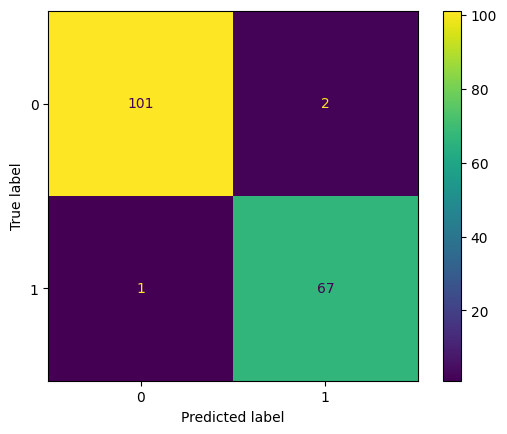

In [23]:
labels_pred = best_rf.predict(values_test)
cm = confusion_matrix(labels_test, labels_pred)
print(f"Média do cross-validation do teste: {np.mean(cross_val_score(best_rf, values_test, labels_test, cv=5))}")
print(f"Acurâcia do teste: {accuracy_score(labels_test, labels_pred)}")
print(f"Precisão do teste: {precision_score(labels_test, labels_pred, pos_label='B')}")
print(f"Sensibilidade (recall) do teste: {recall_score(labels_test, labels_pred, pos_label='B')}")
print(f"F1-Score do teste: {f1_score(labels_test, labels_pred, pos_label='B')}")
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

Acurâcia do teste: 0.9649122807017544
Acurâcia do treino: 0.9447236180904522
Média do cross-validation do teste: 0.9653781512605042
Precisão do teste: 0.9619047619047619
Sensibilidade (recall) do teste: 0.9805825242718447
F1-Score do teste: 0.9711538461538461


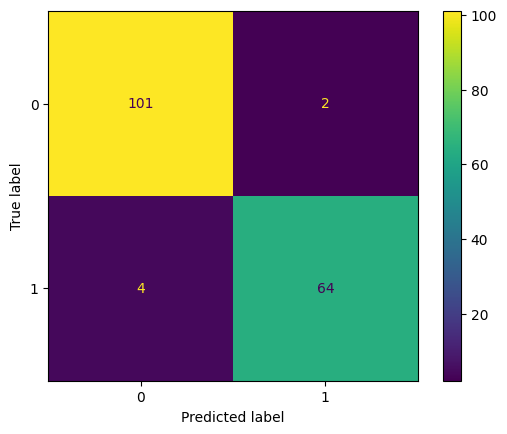

In [26]:
rf = RandomForestClassifier(n_estimators=5, max_depth=2, random_state=42)
rf.fit(values_train, labels_train)
labels_pred = rf.predict(values_test)
labels_pred_train = rf.predict(values_train)
cm = confusion_matrix(labels_test, labels_pred)
print(f"Acurâcia do teste: {accuracy_score(labels_test, labels_pred)}")
print(f"Acurâcia do treino: {accuracy_score(labels_train, labels_pred_train)}")
print(f"Média do cross-validation do teste: {np.mean(cross_val_score(best_rf, values_test, labels_test, cv=5))}")
print(f"Precisão do teste: {precision_score(labels_test, labels_pred, pos_label='B')}")
print(f"Sensibilidade (recall) do teste: {recall_score(labels_test, labels_pred, pos_label='B')}")
print(f"F1-Score do teste: {f1_score(labels_test, labels_pred, pos_label='B')}")
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

Portando, como a diferença entre a média do cross-validation do conjunto de treinamento e do conjunto de teste é muito pequeno, e as outras métricas de avaliação da performace do modelo em classificar os dados de teste indicam uma boa performance e não apresentam diferenças significativas, podemos dizer que houve uma pequena quantidade de overfitting, que ainda pode ser considerada aceitável, visto que a matriz de confusão mostra que a maioria das instâncias foram classificadas corretamente, com apenas 4 delas classificadas errado.

## Mostrando a Random Forest

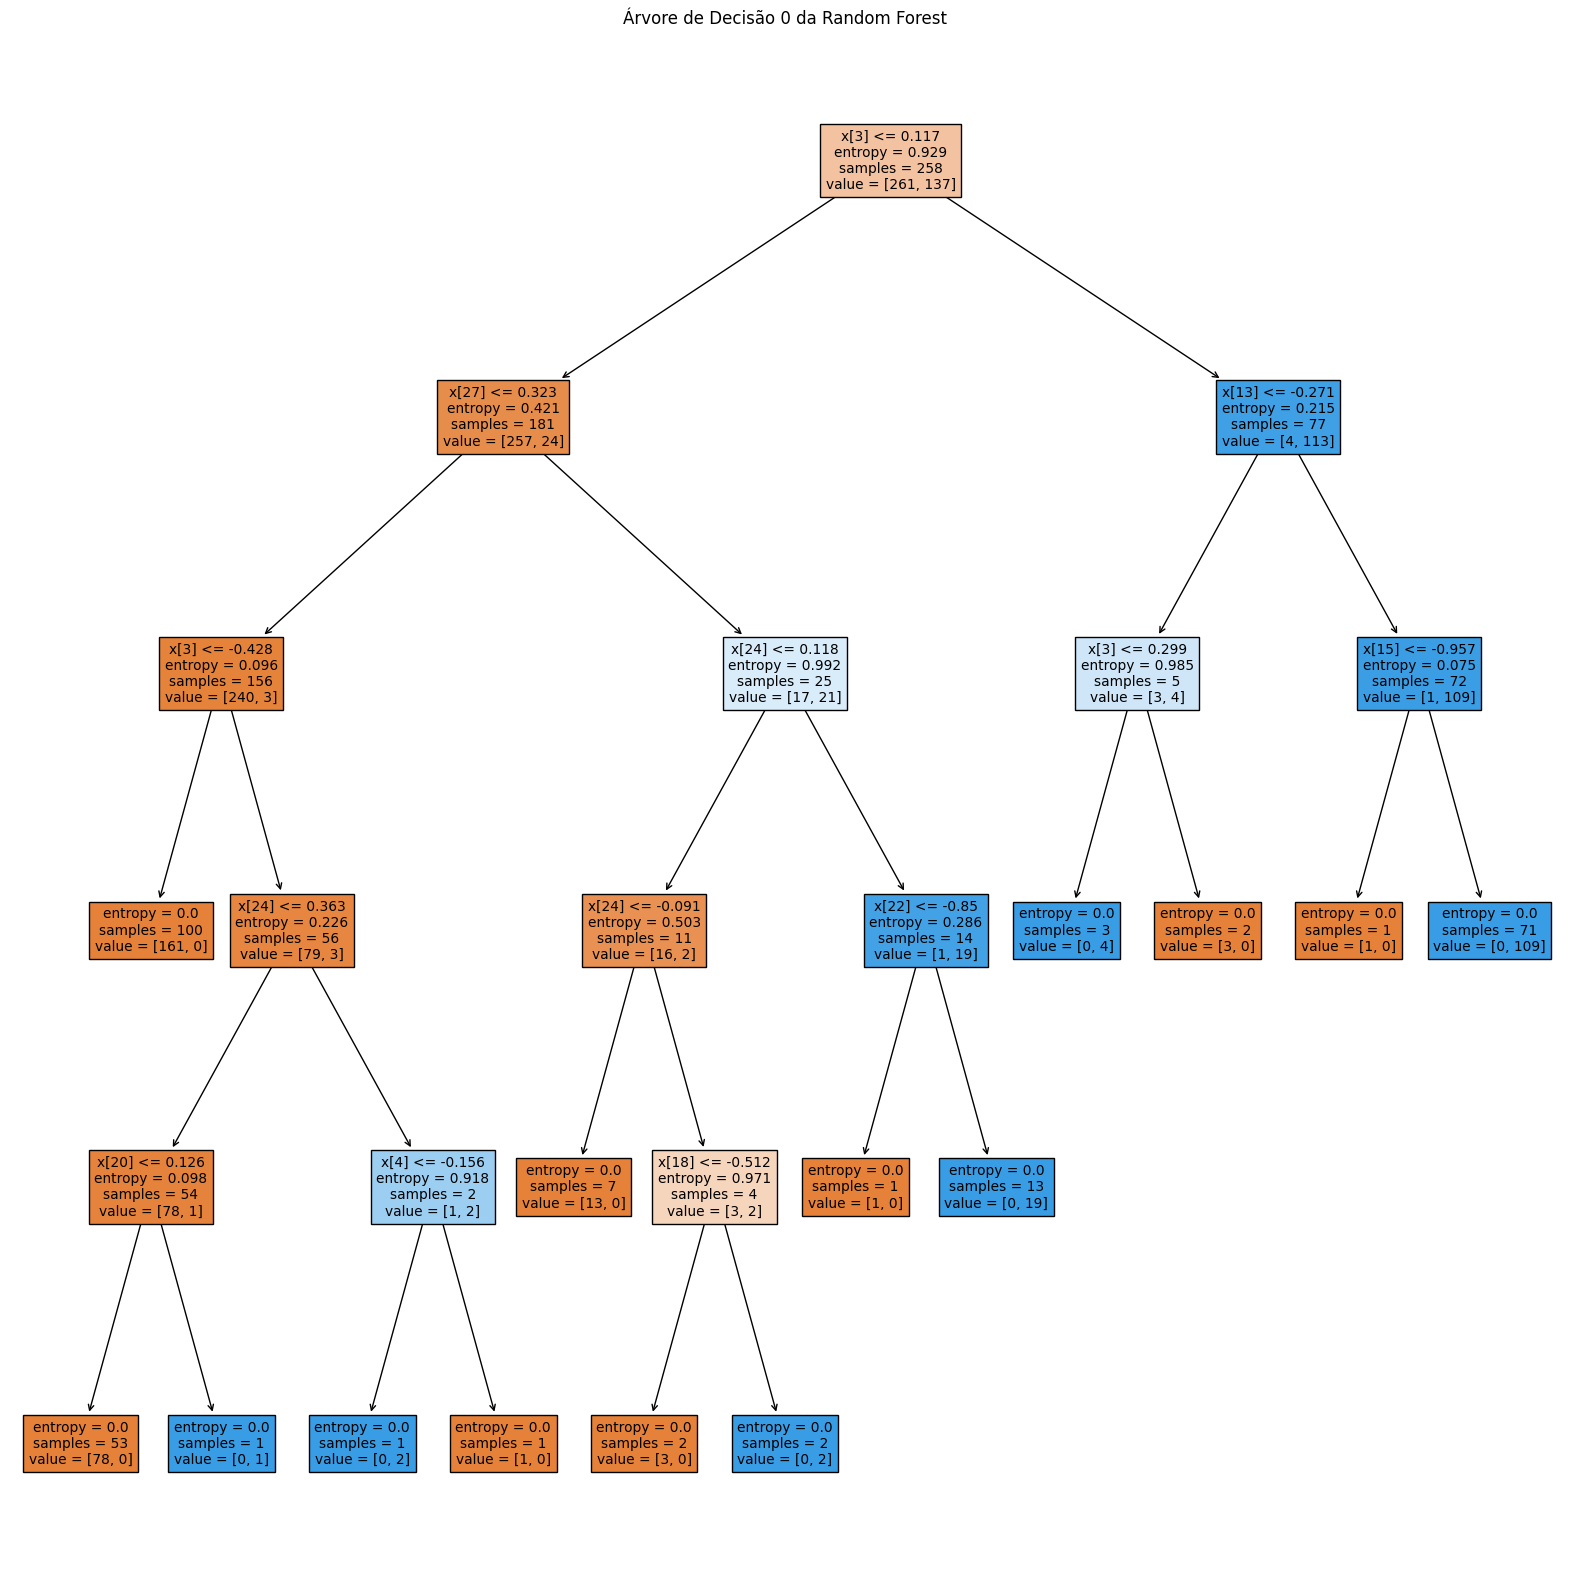

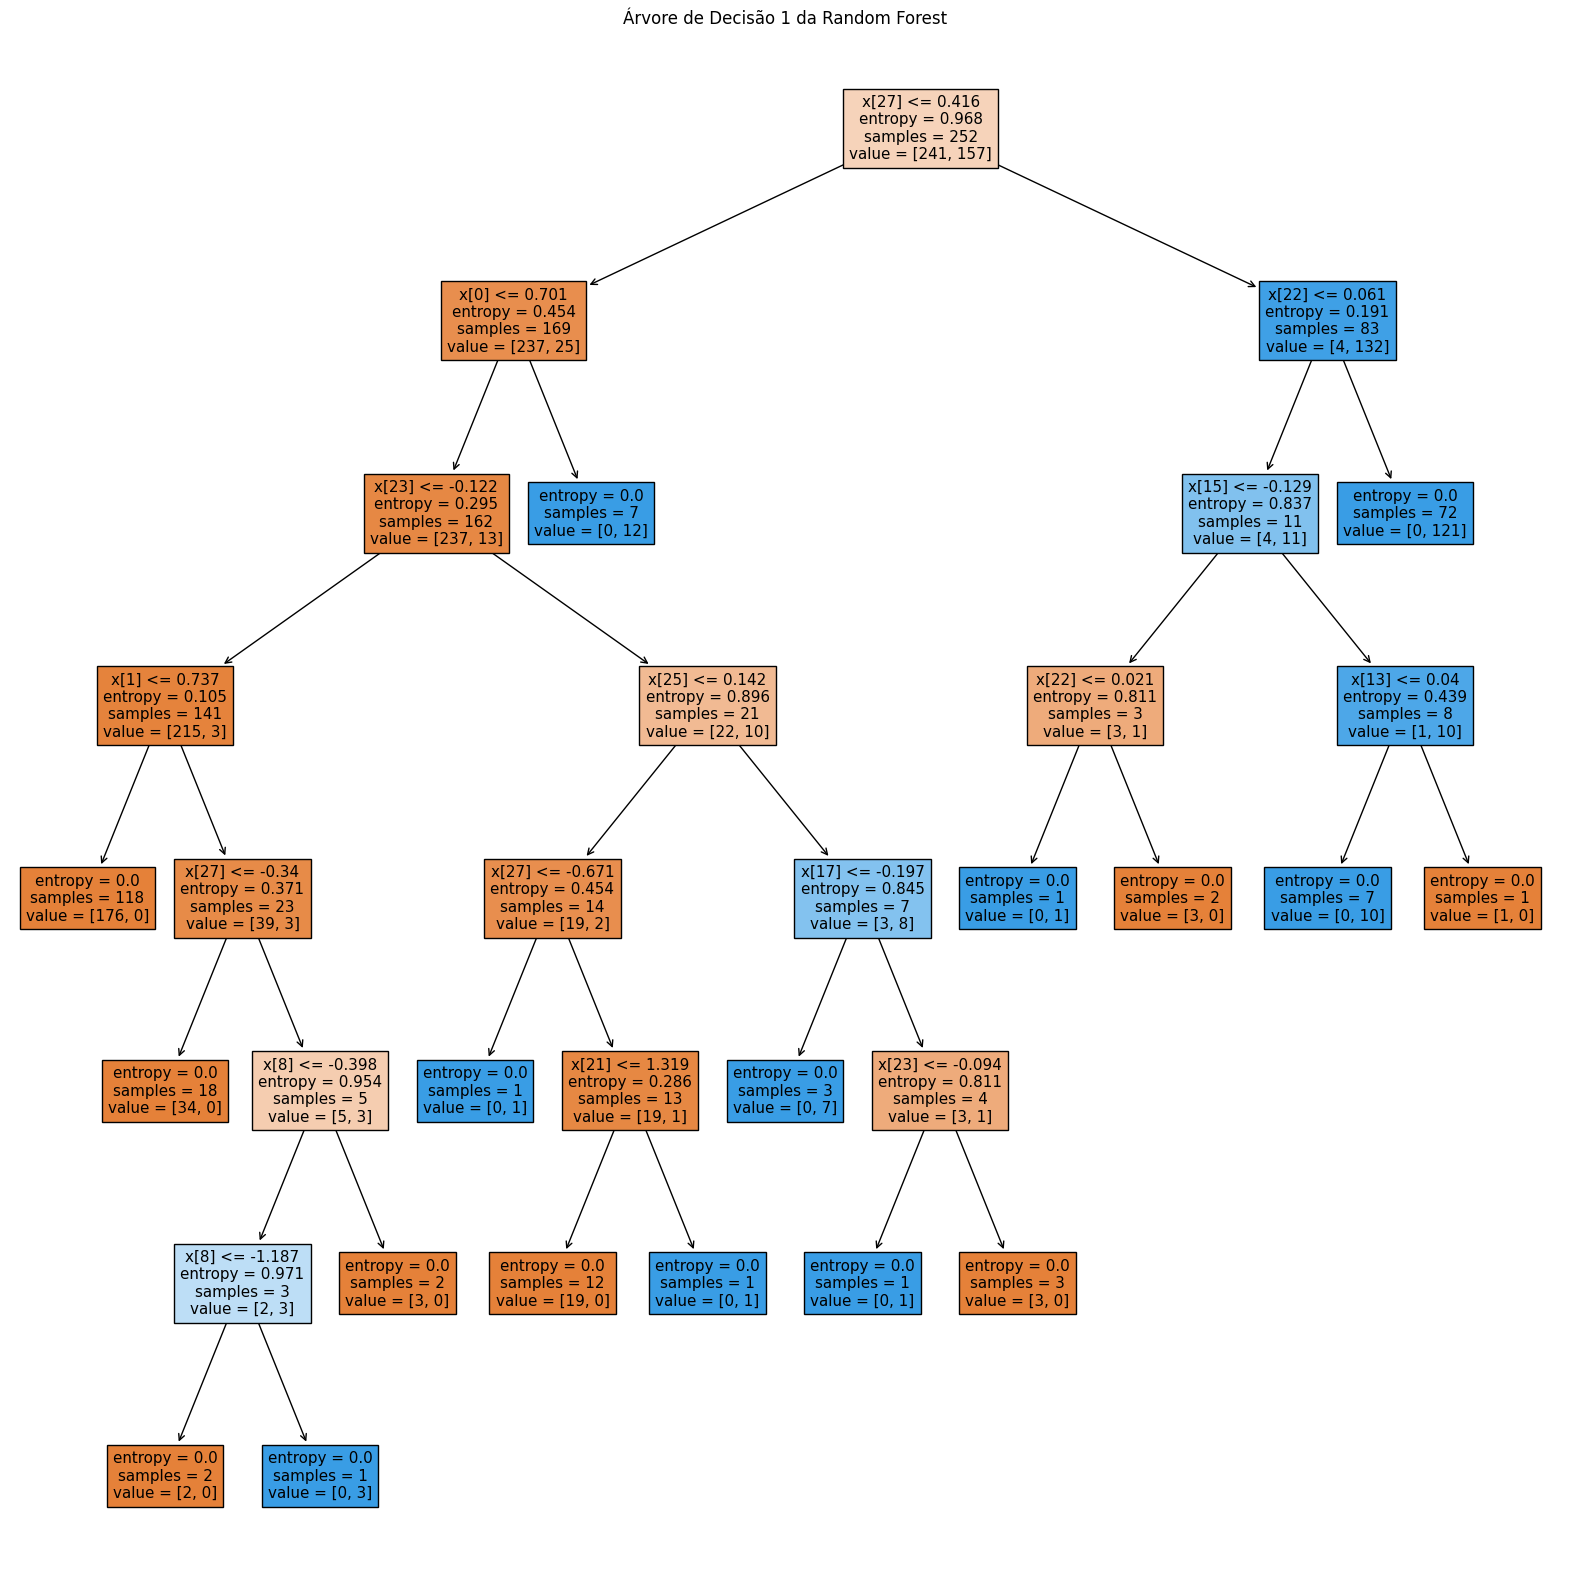

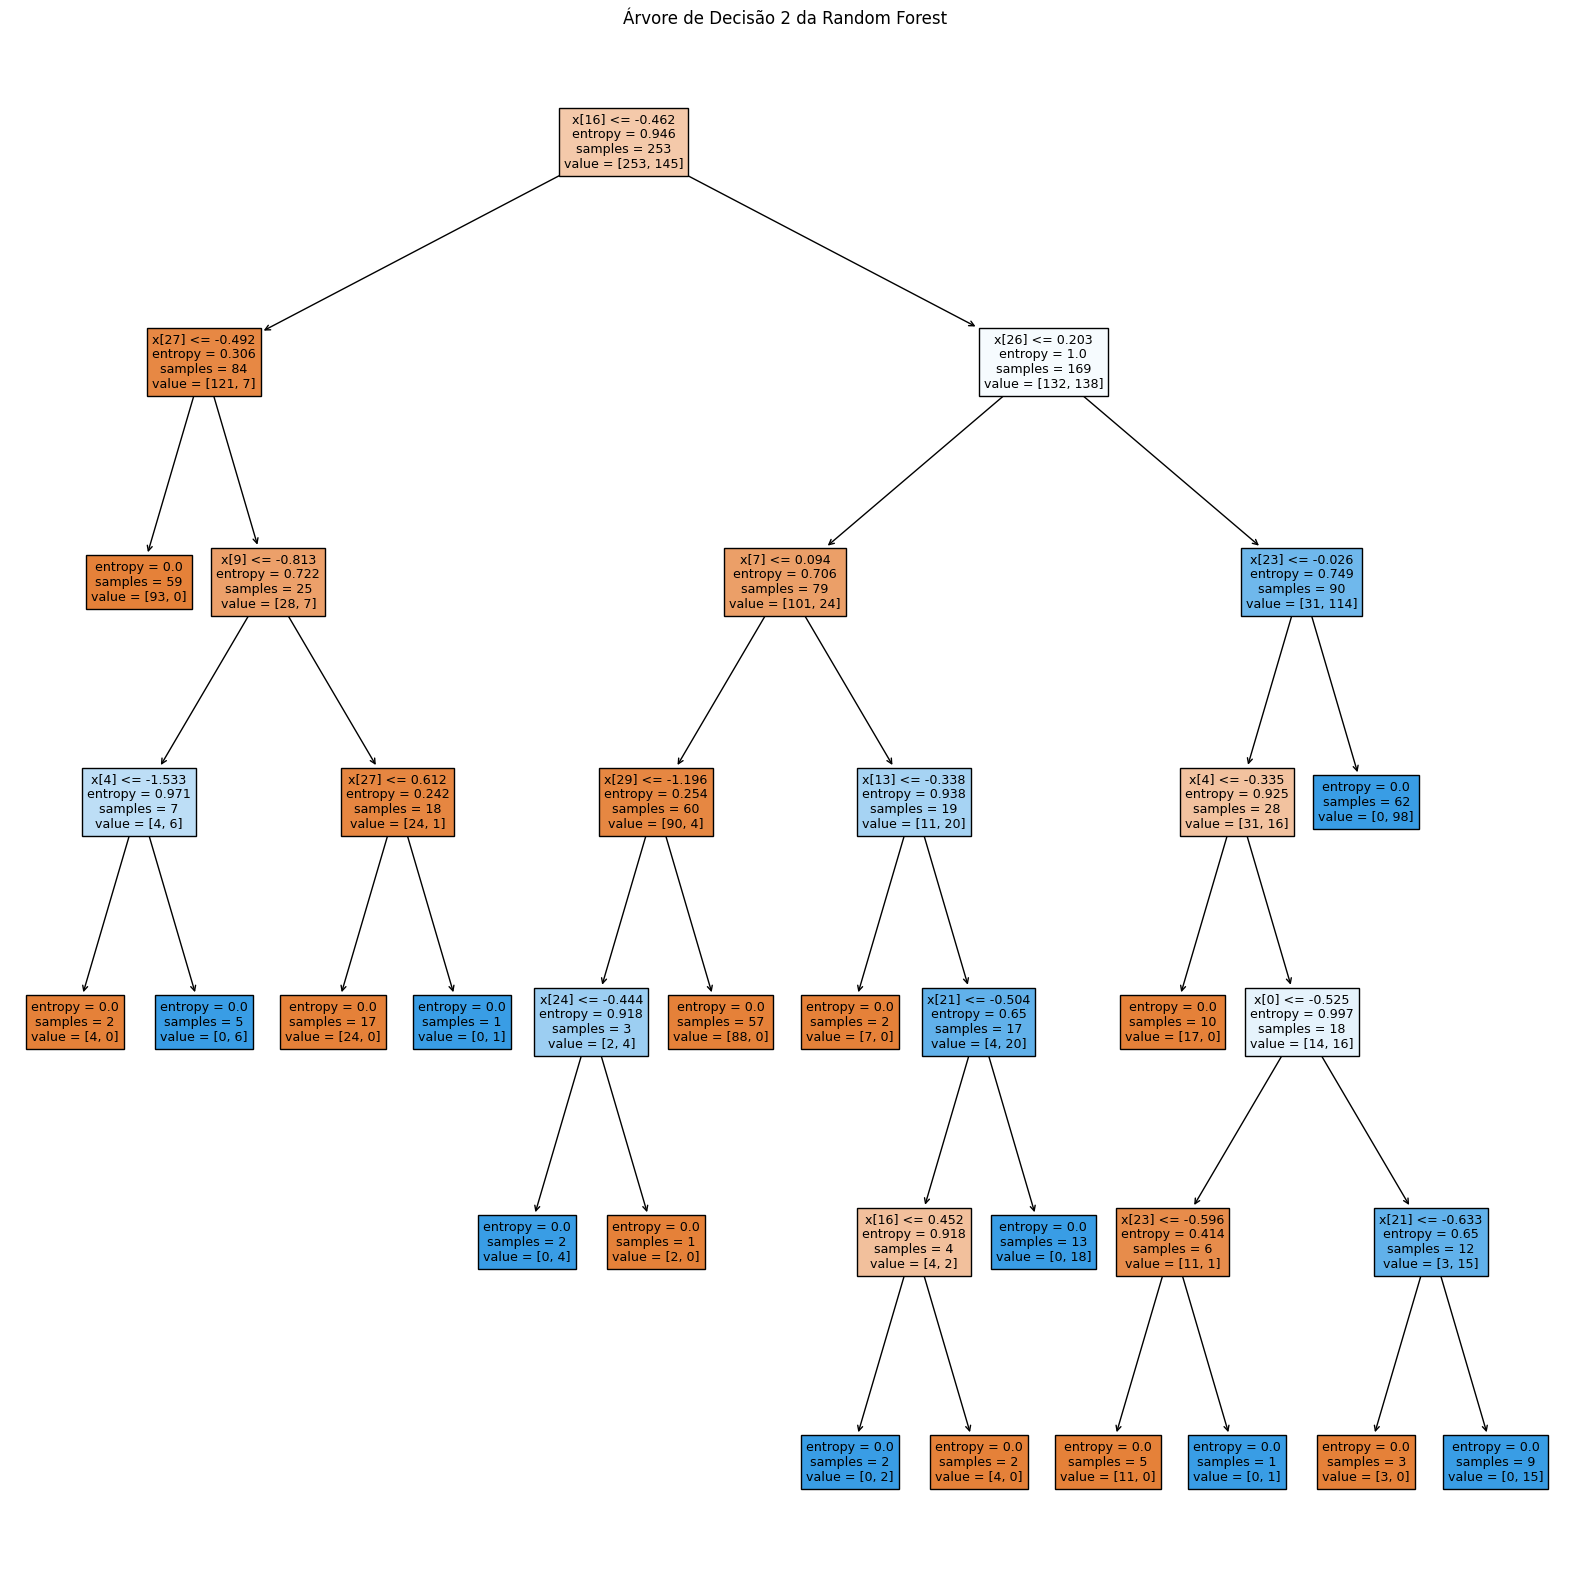

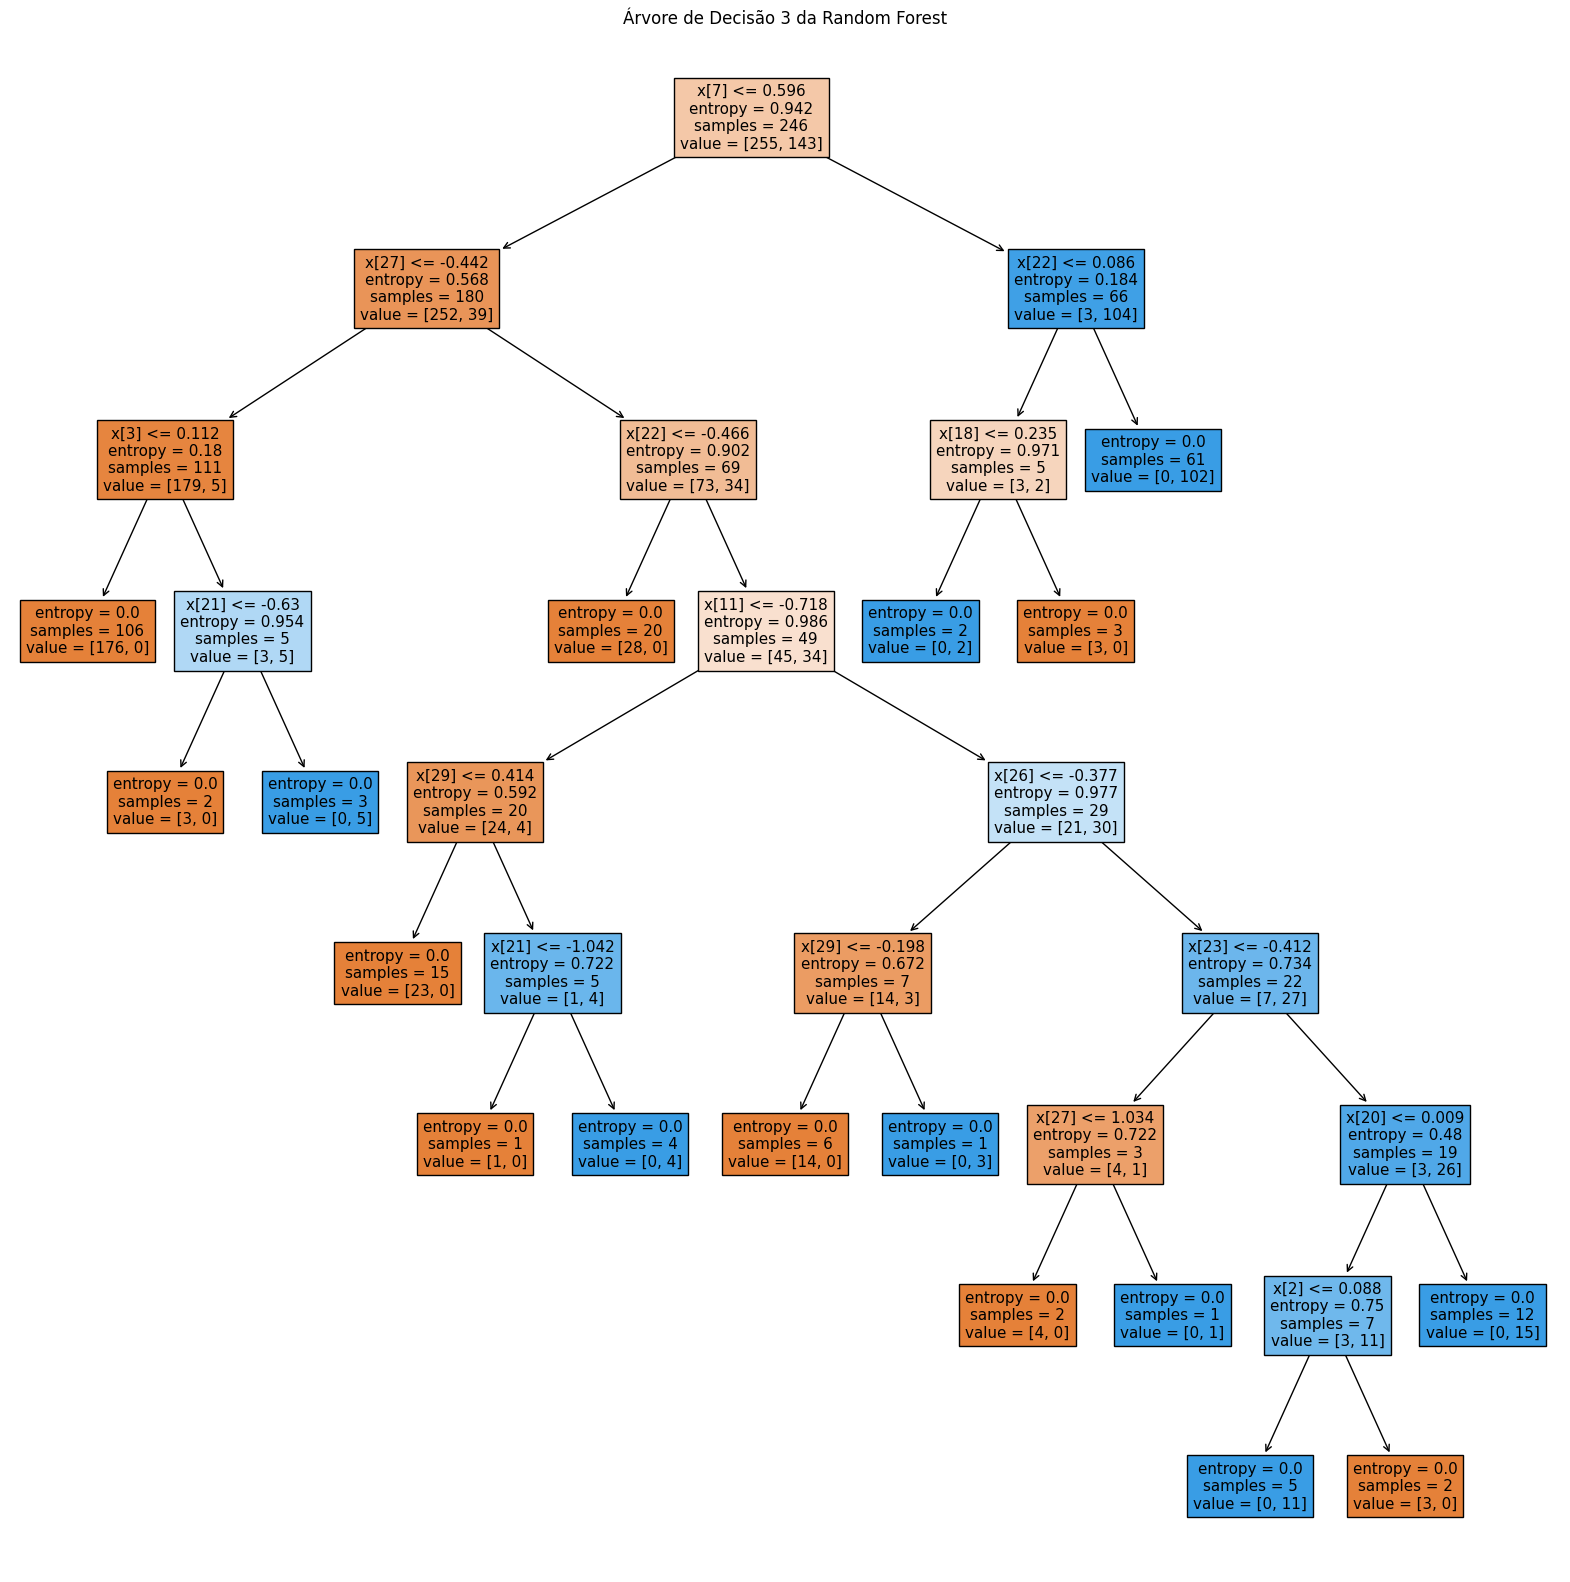

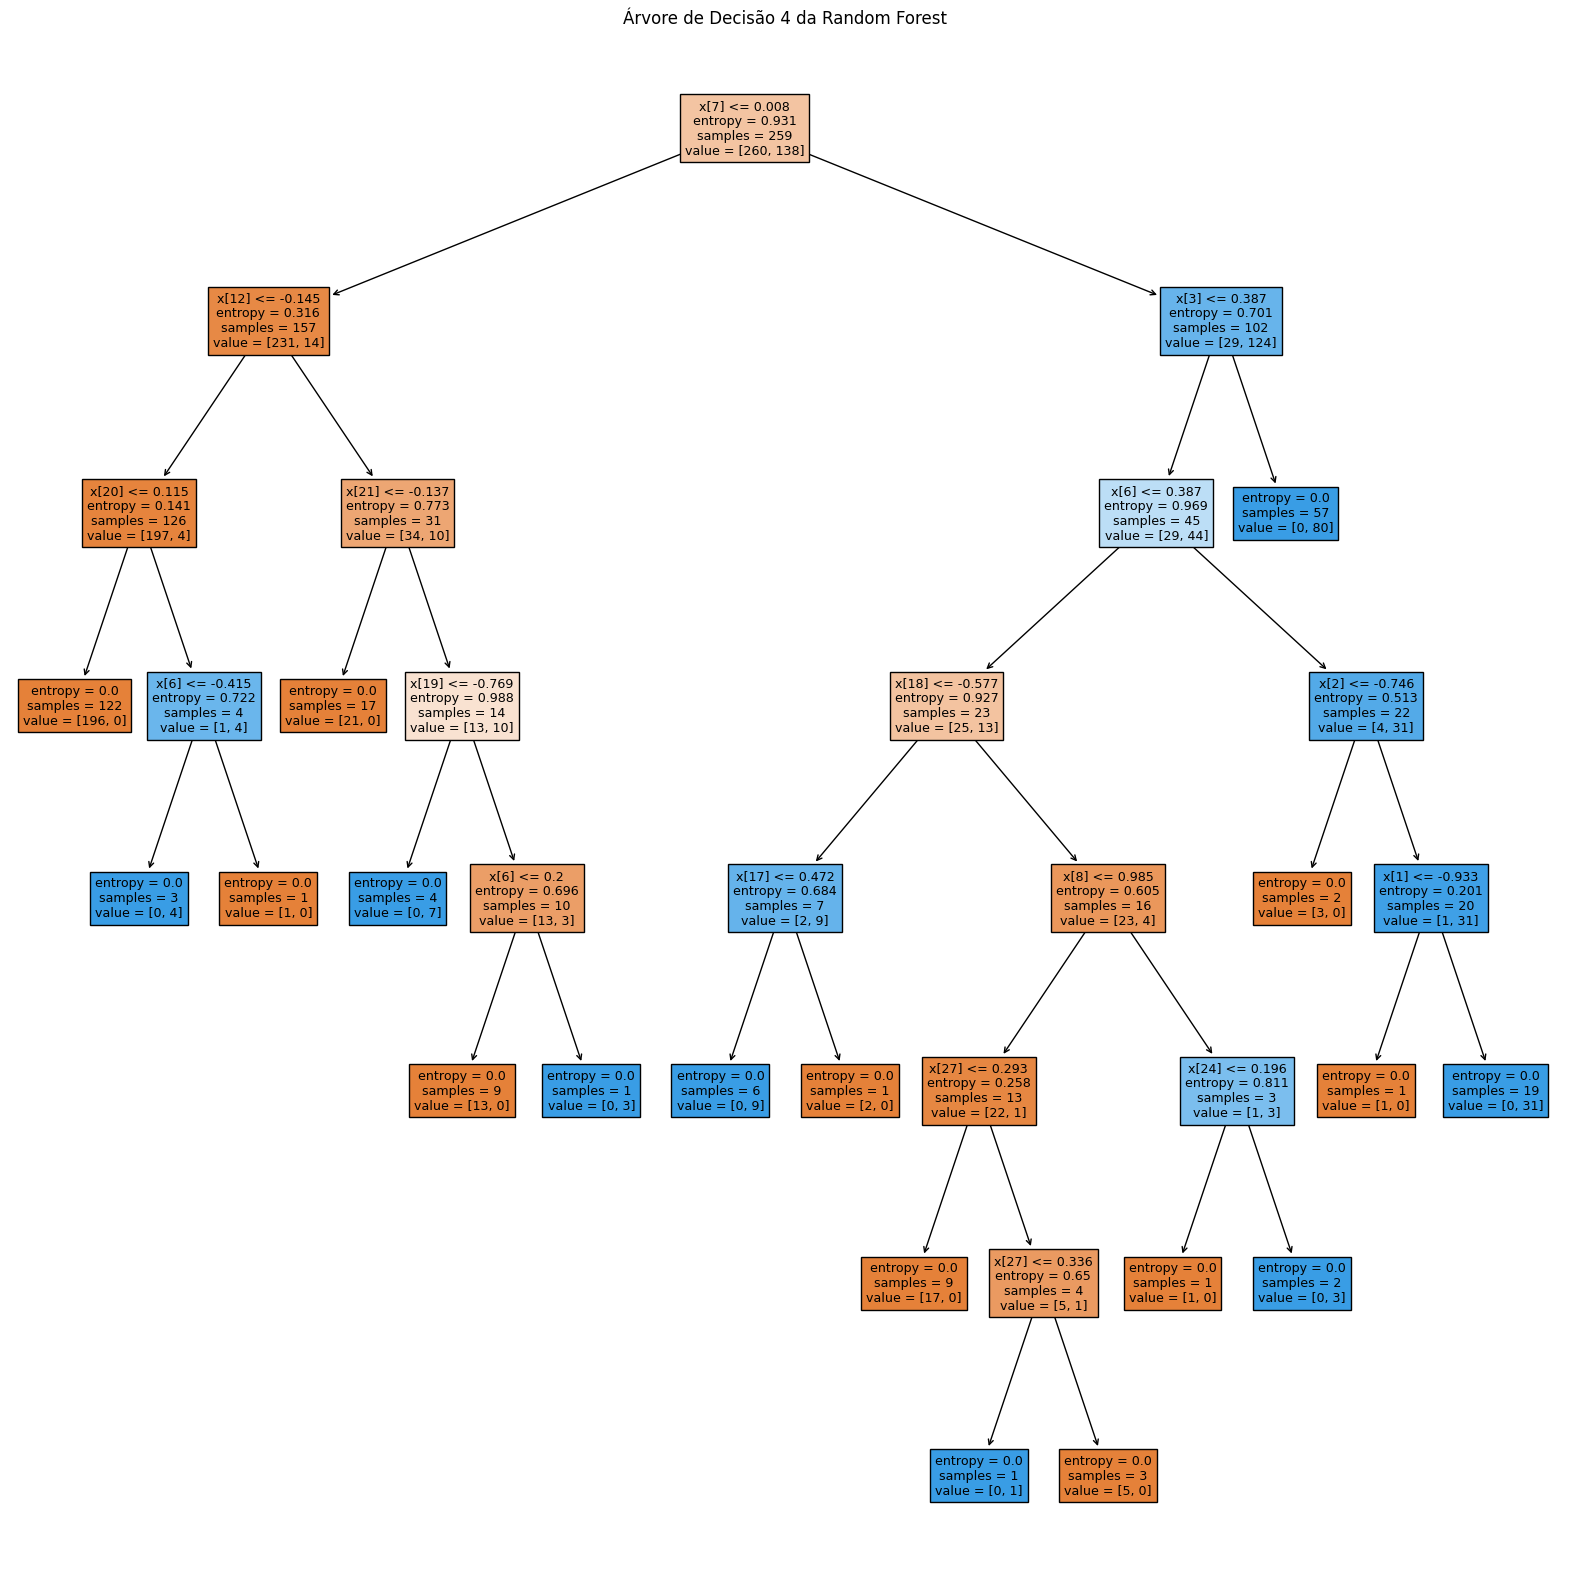

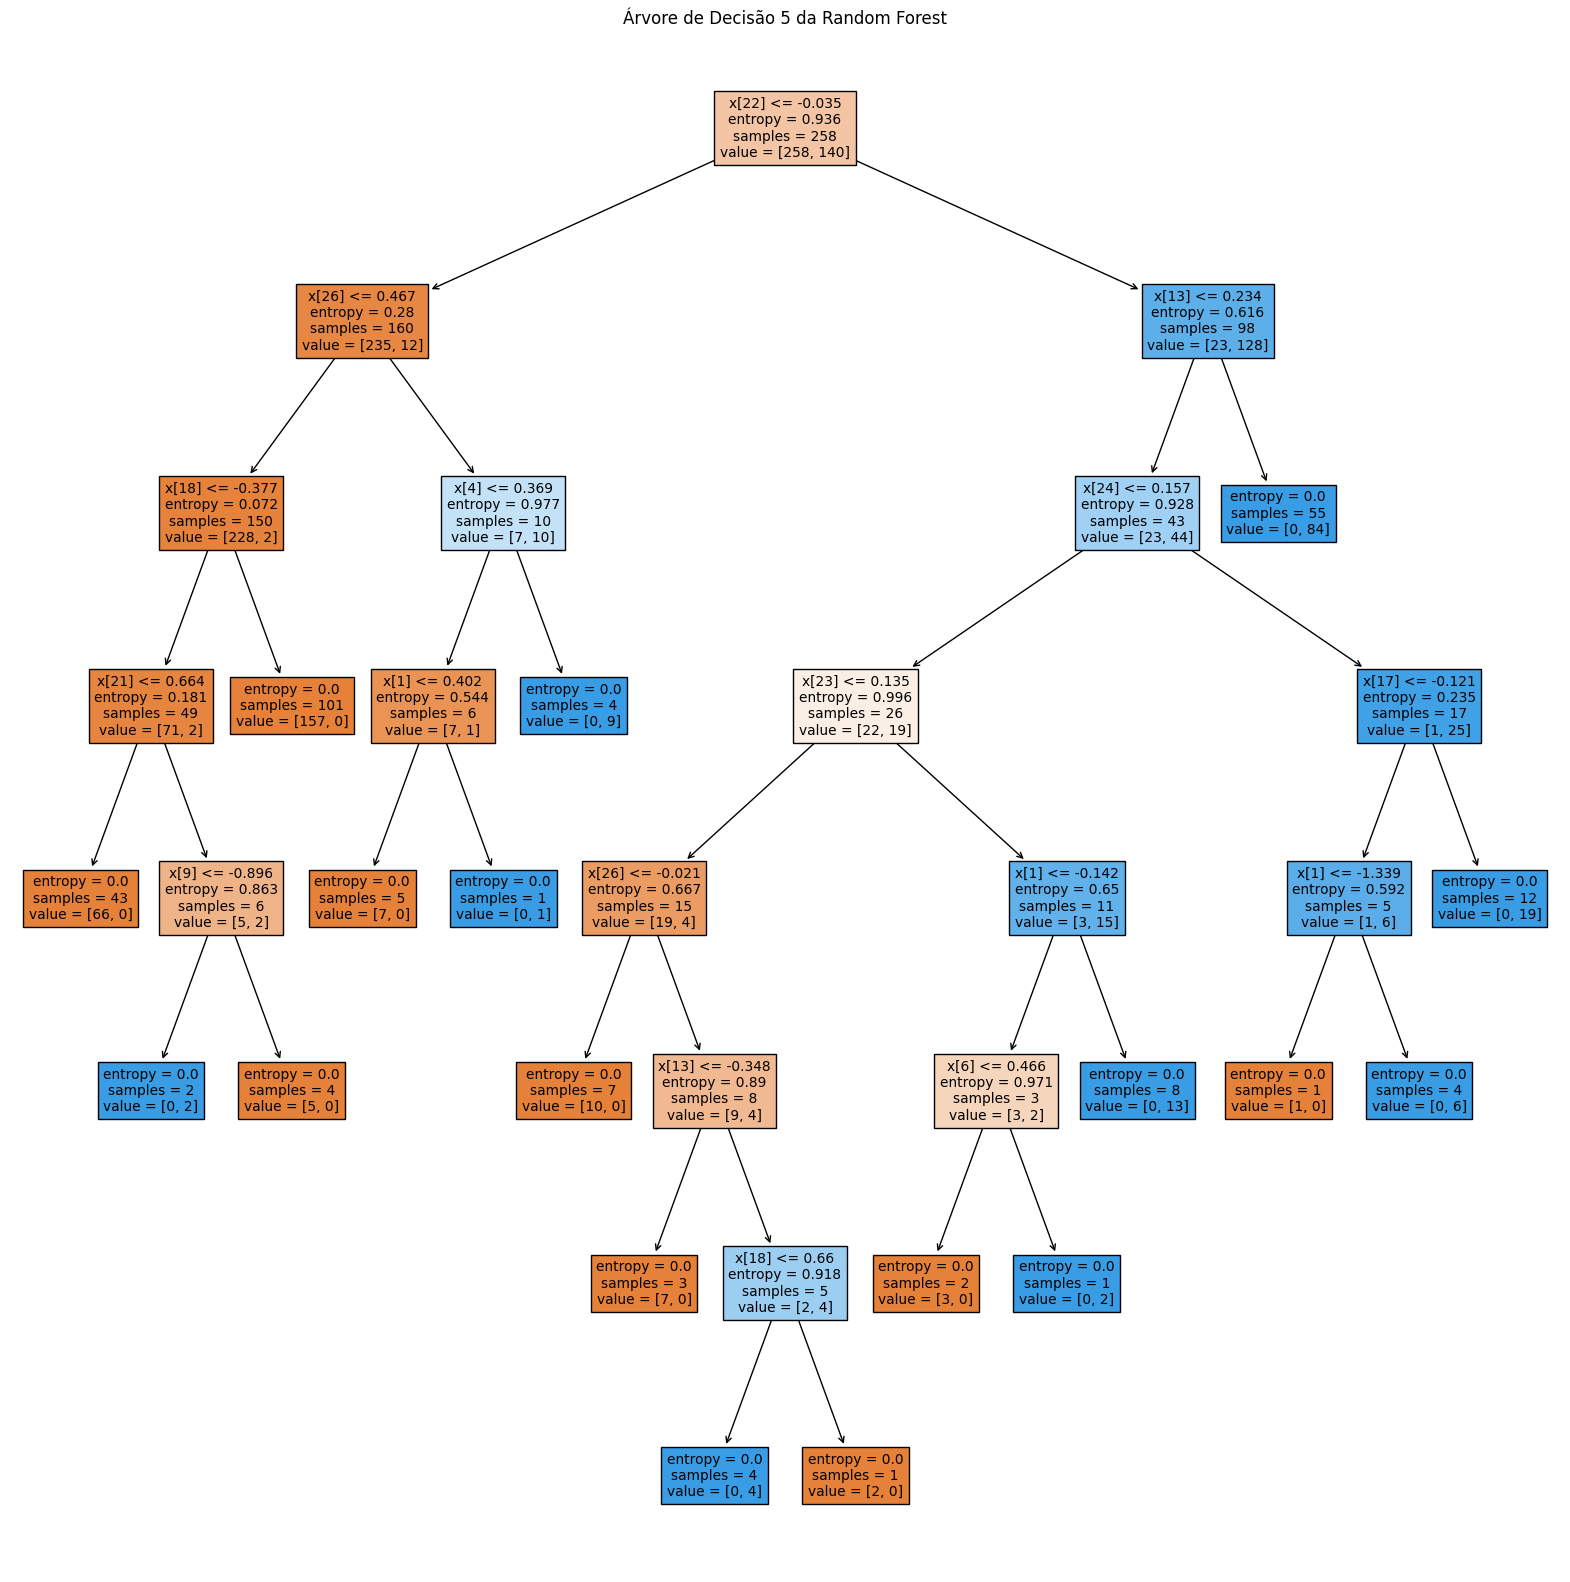

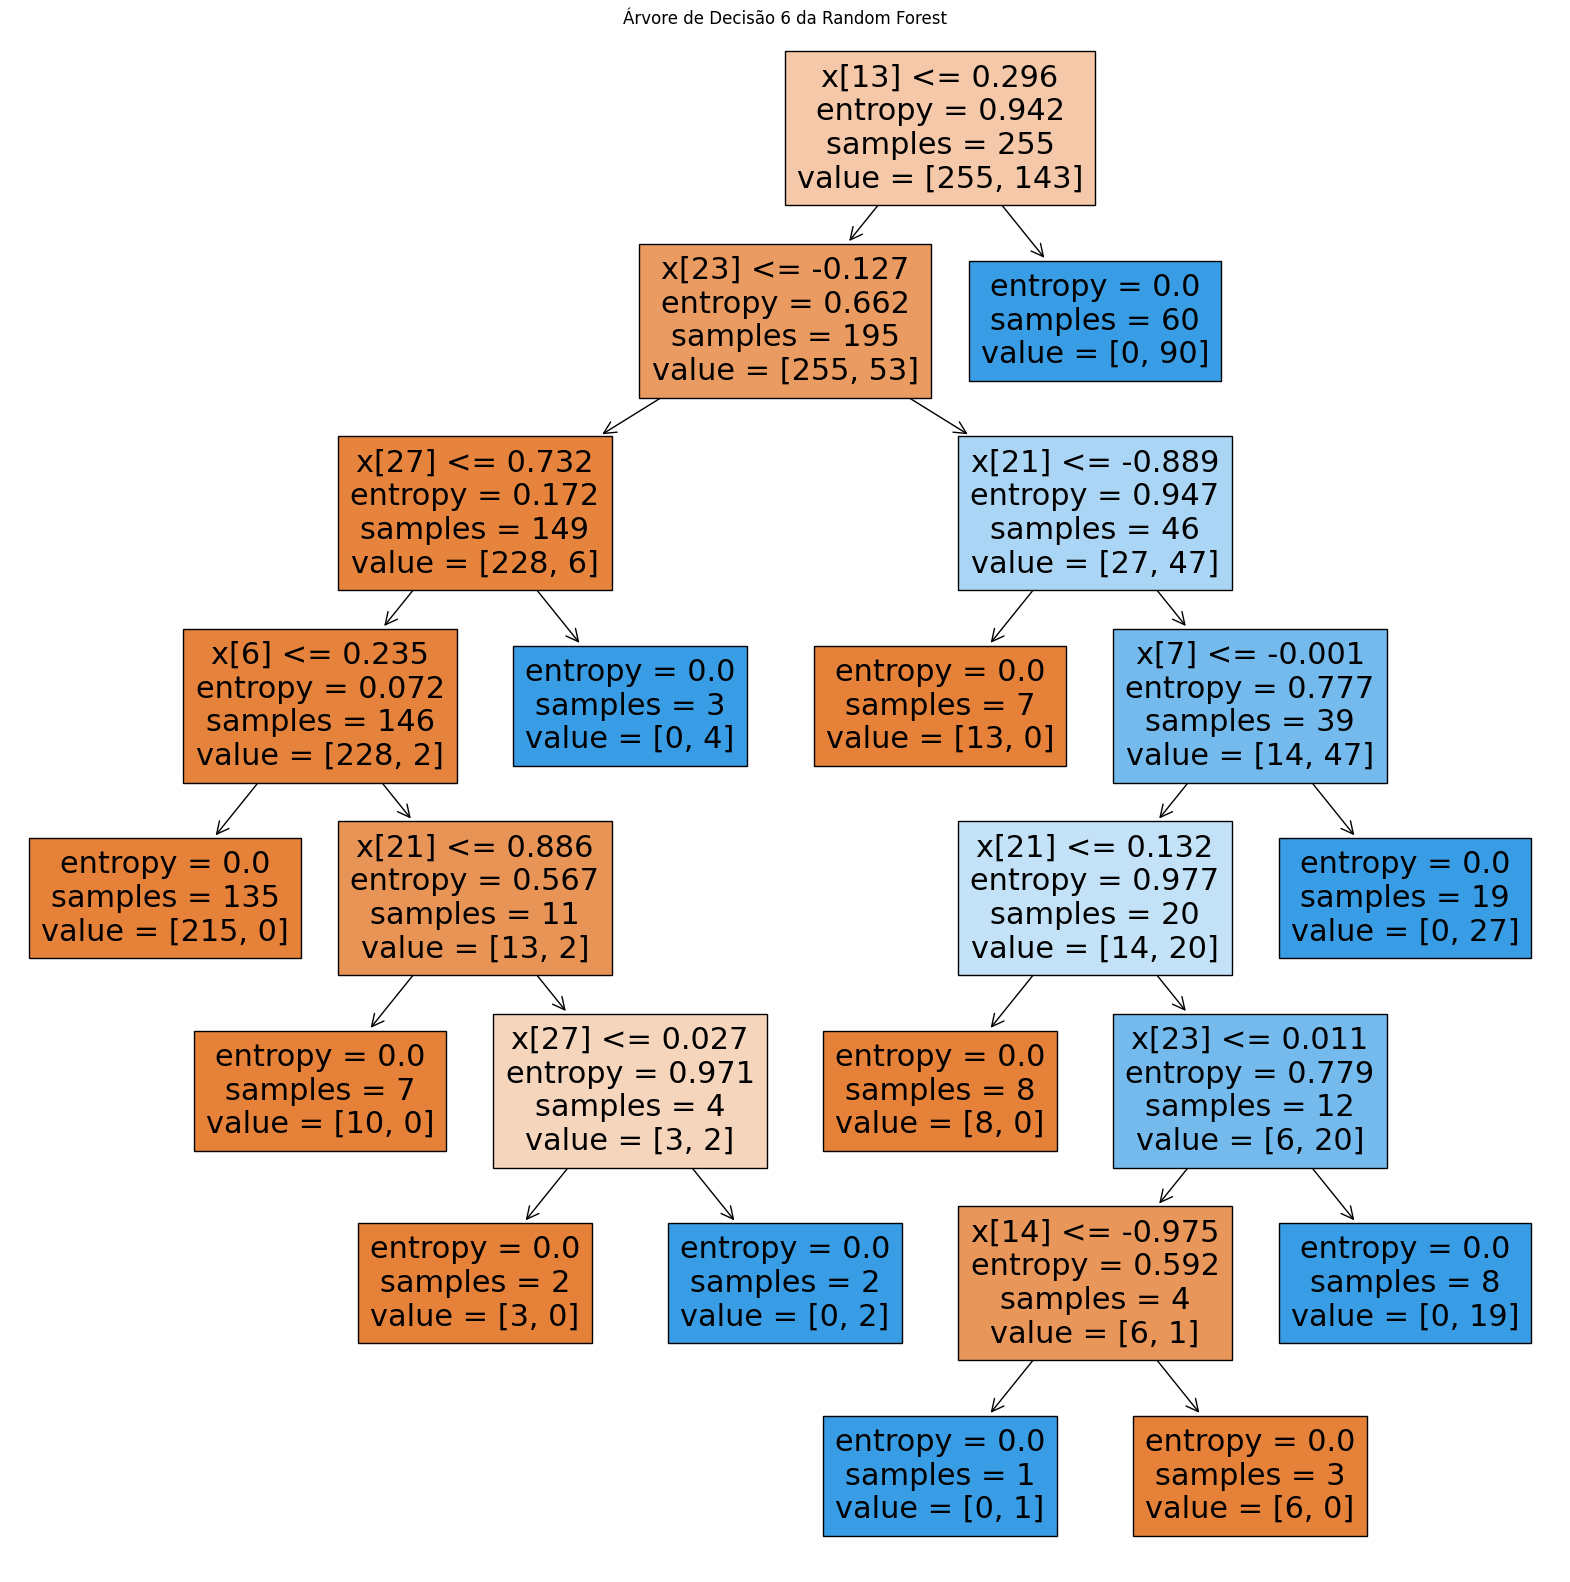

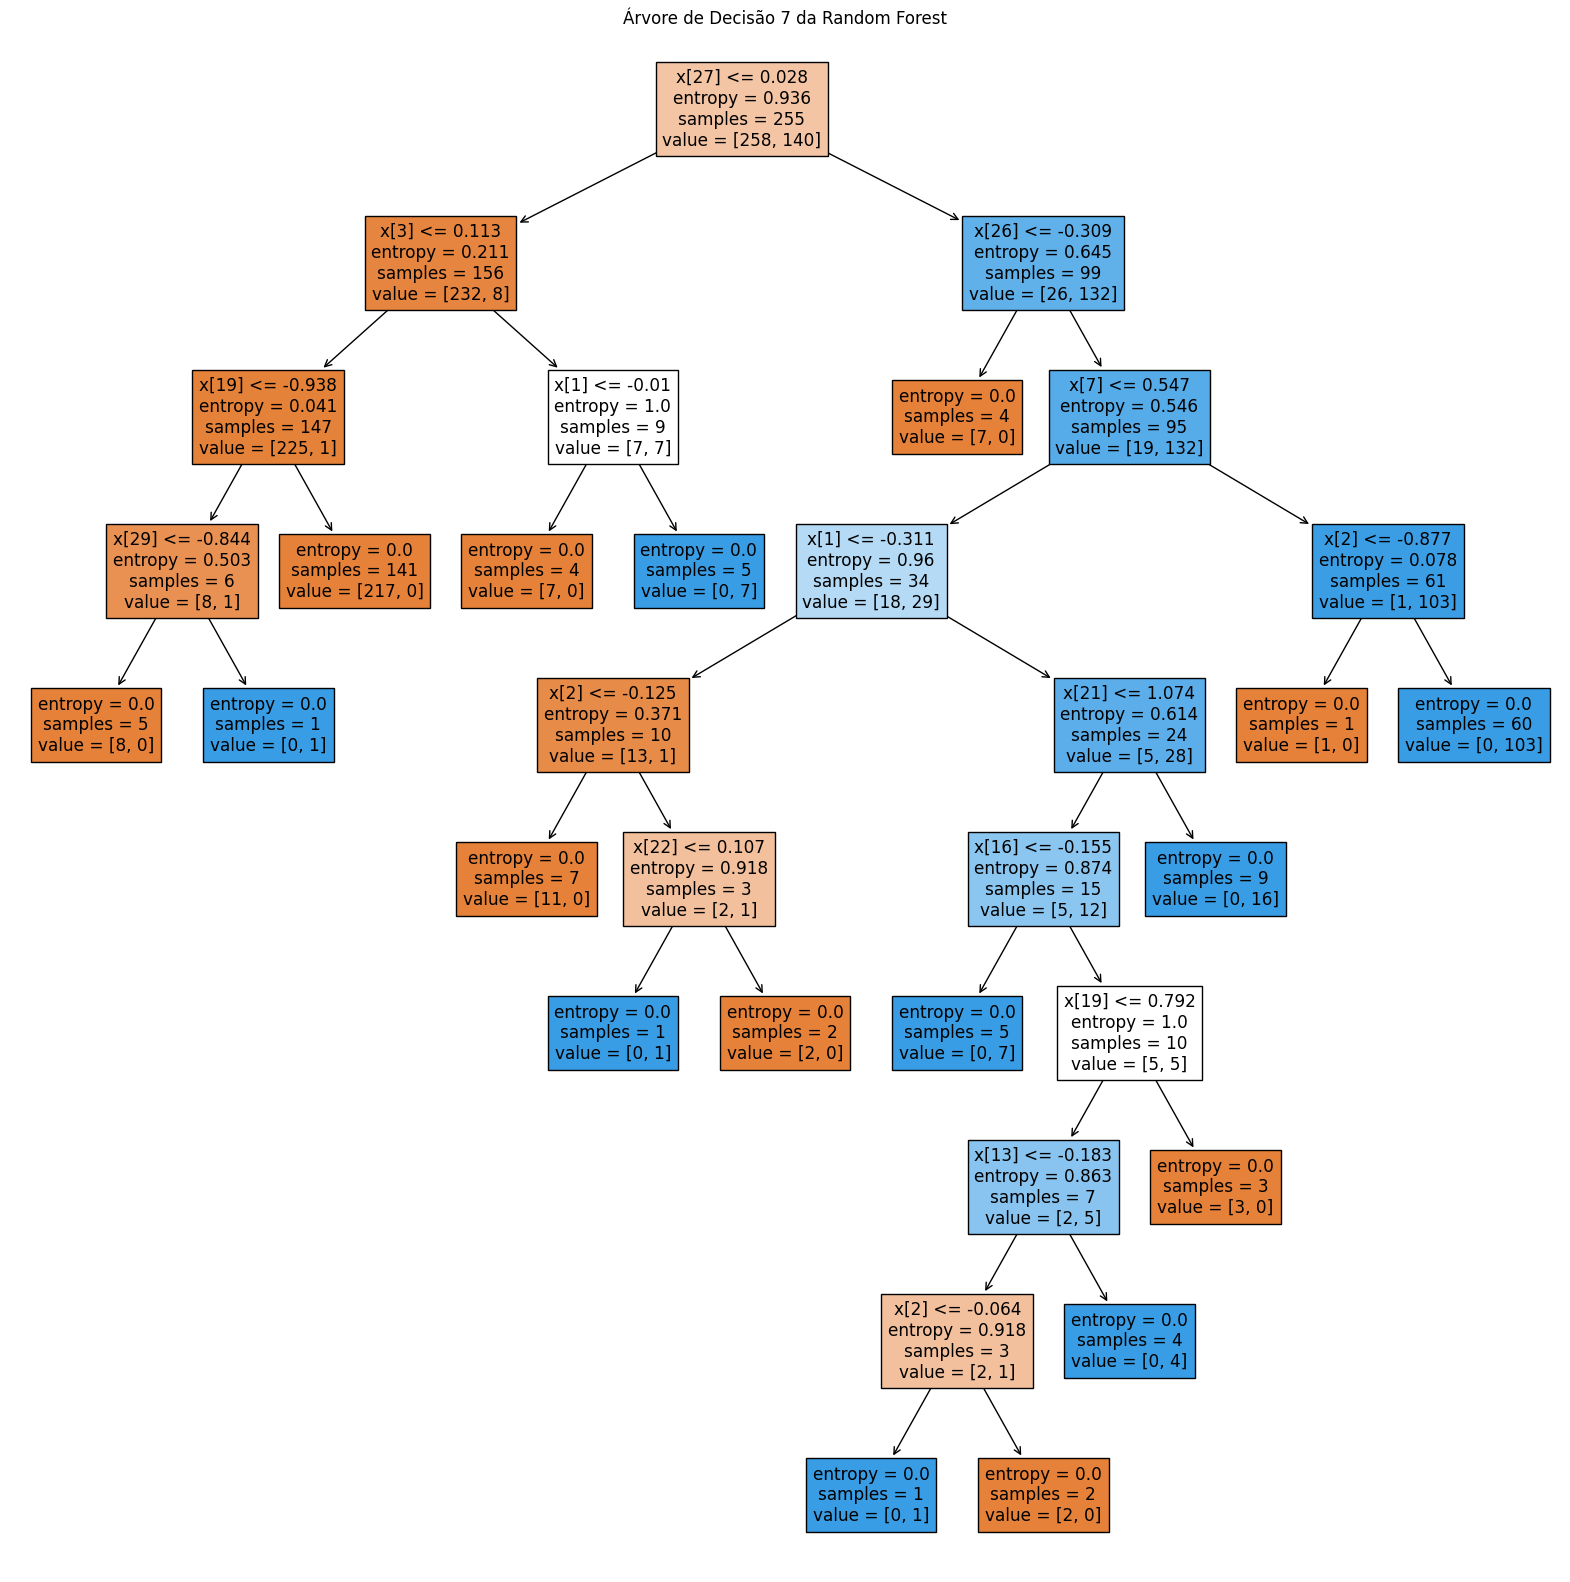

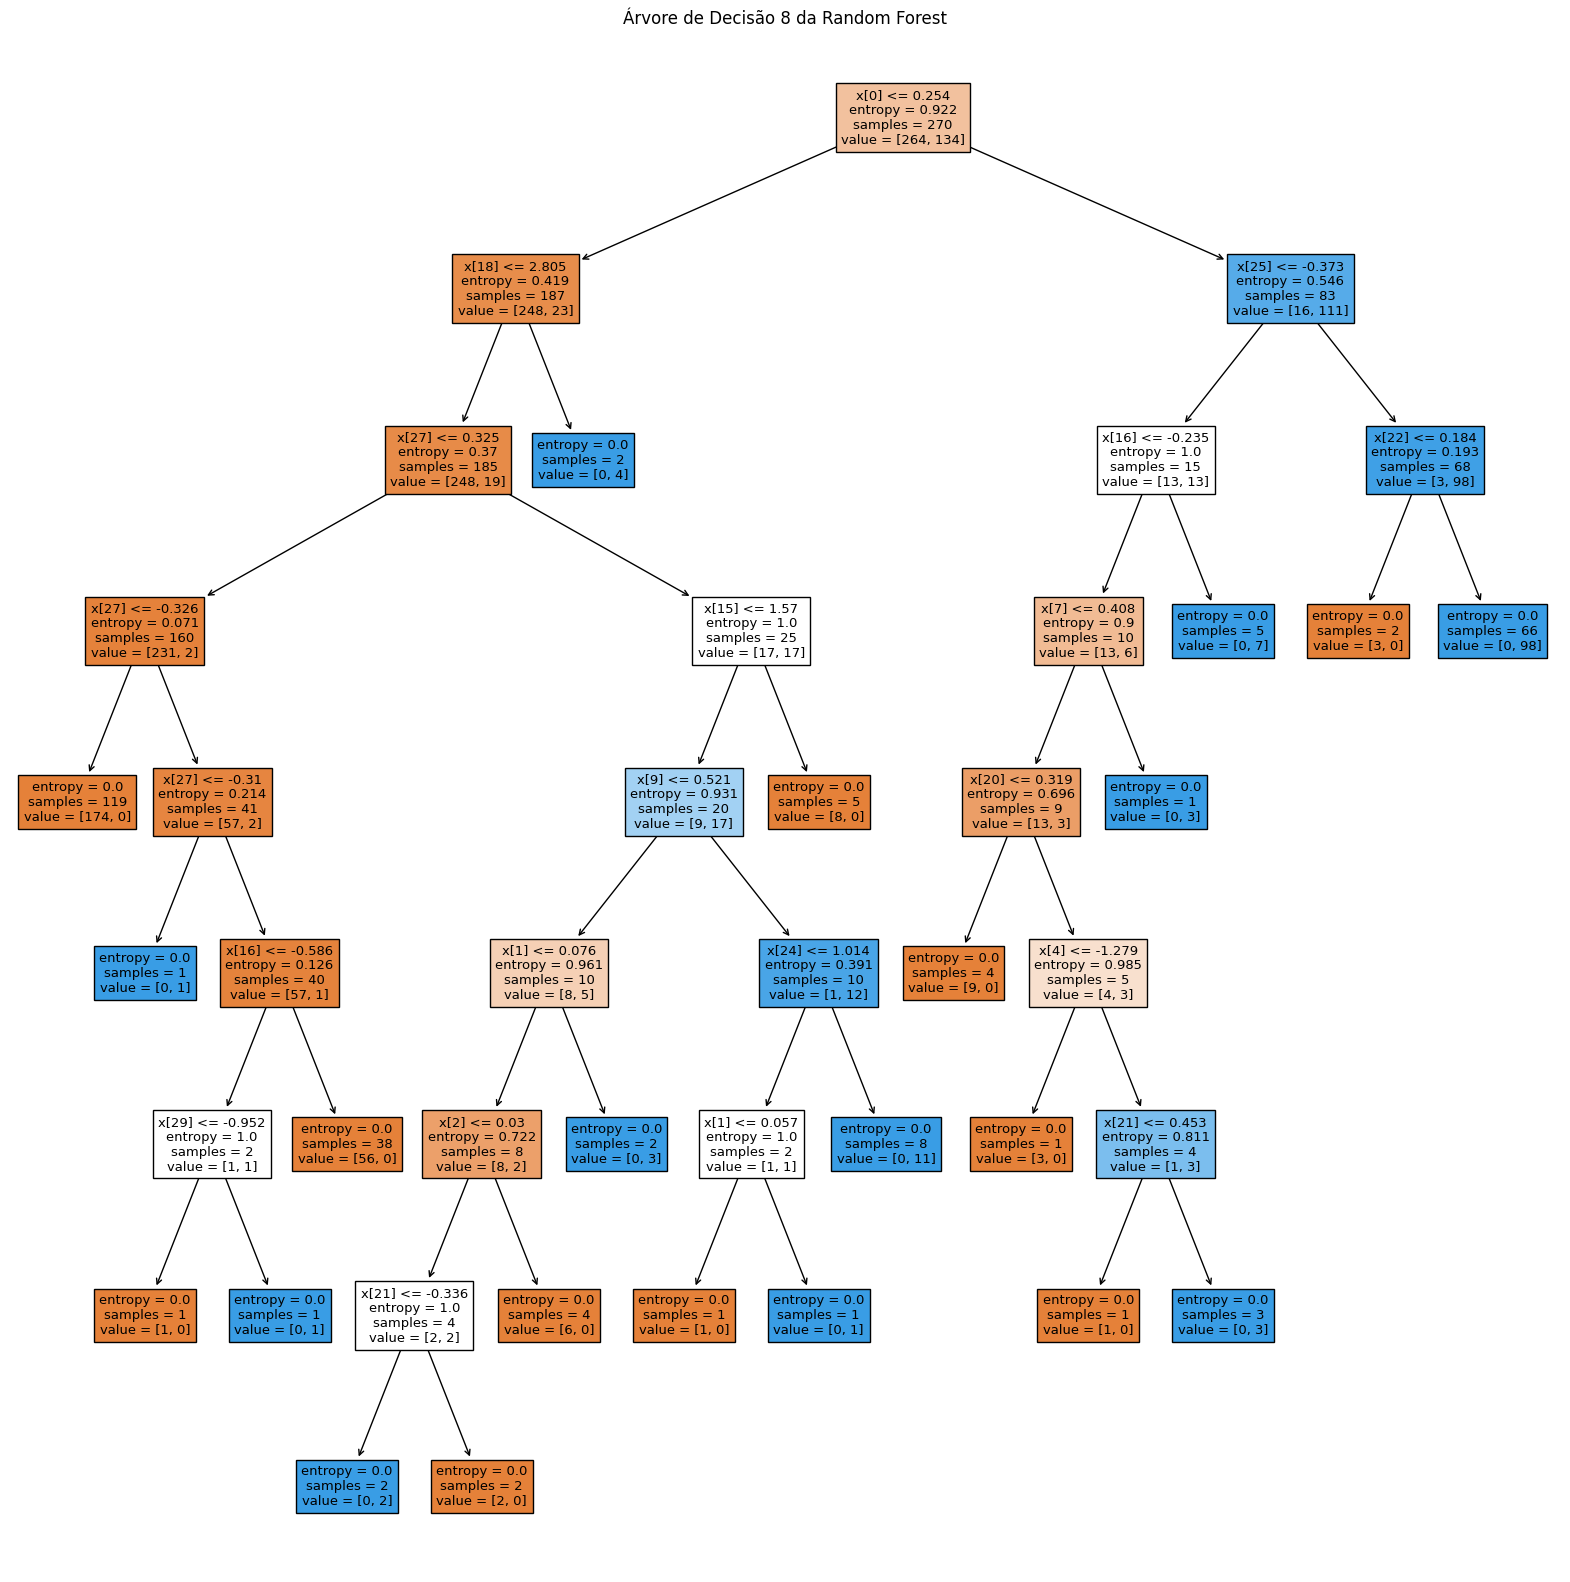

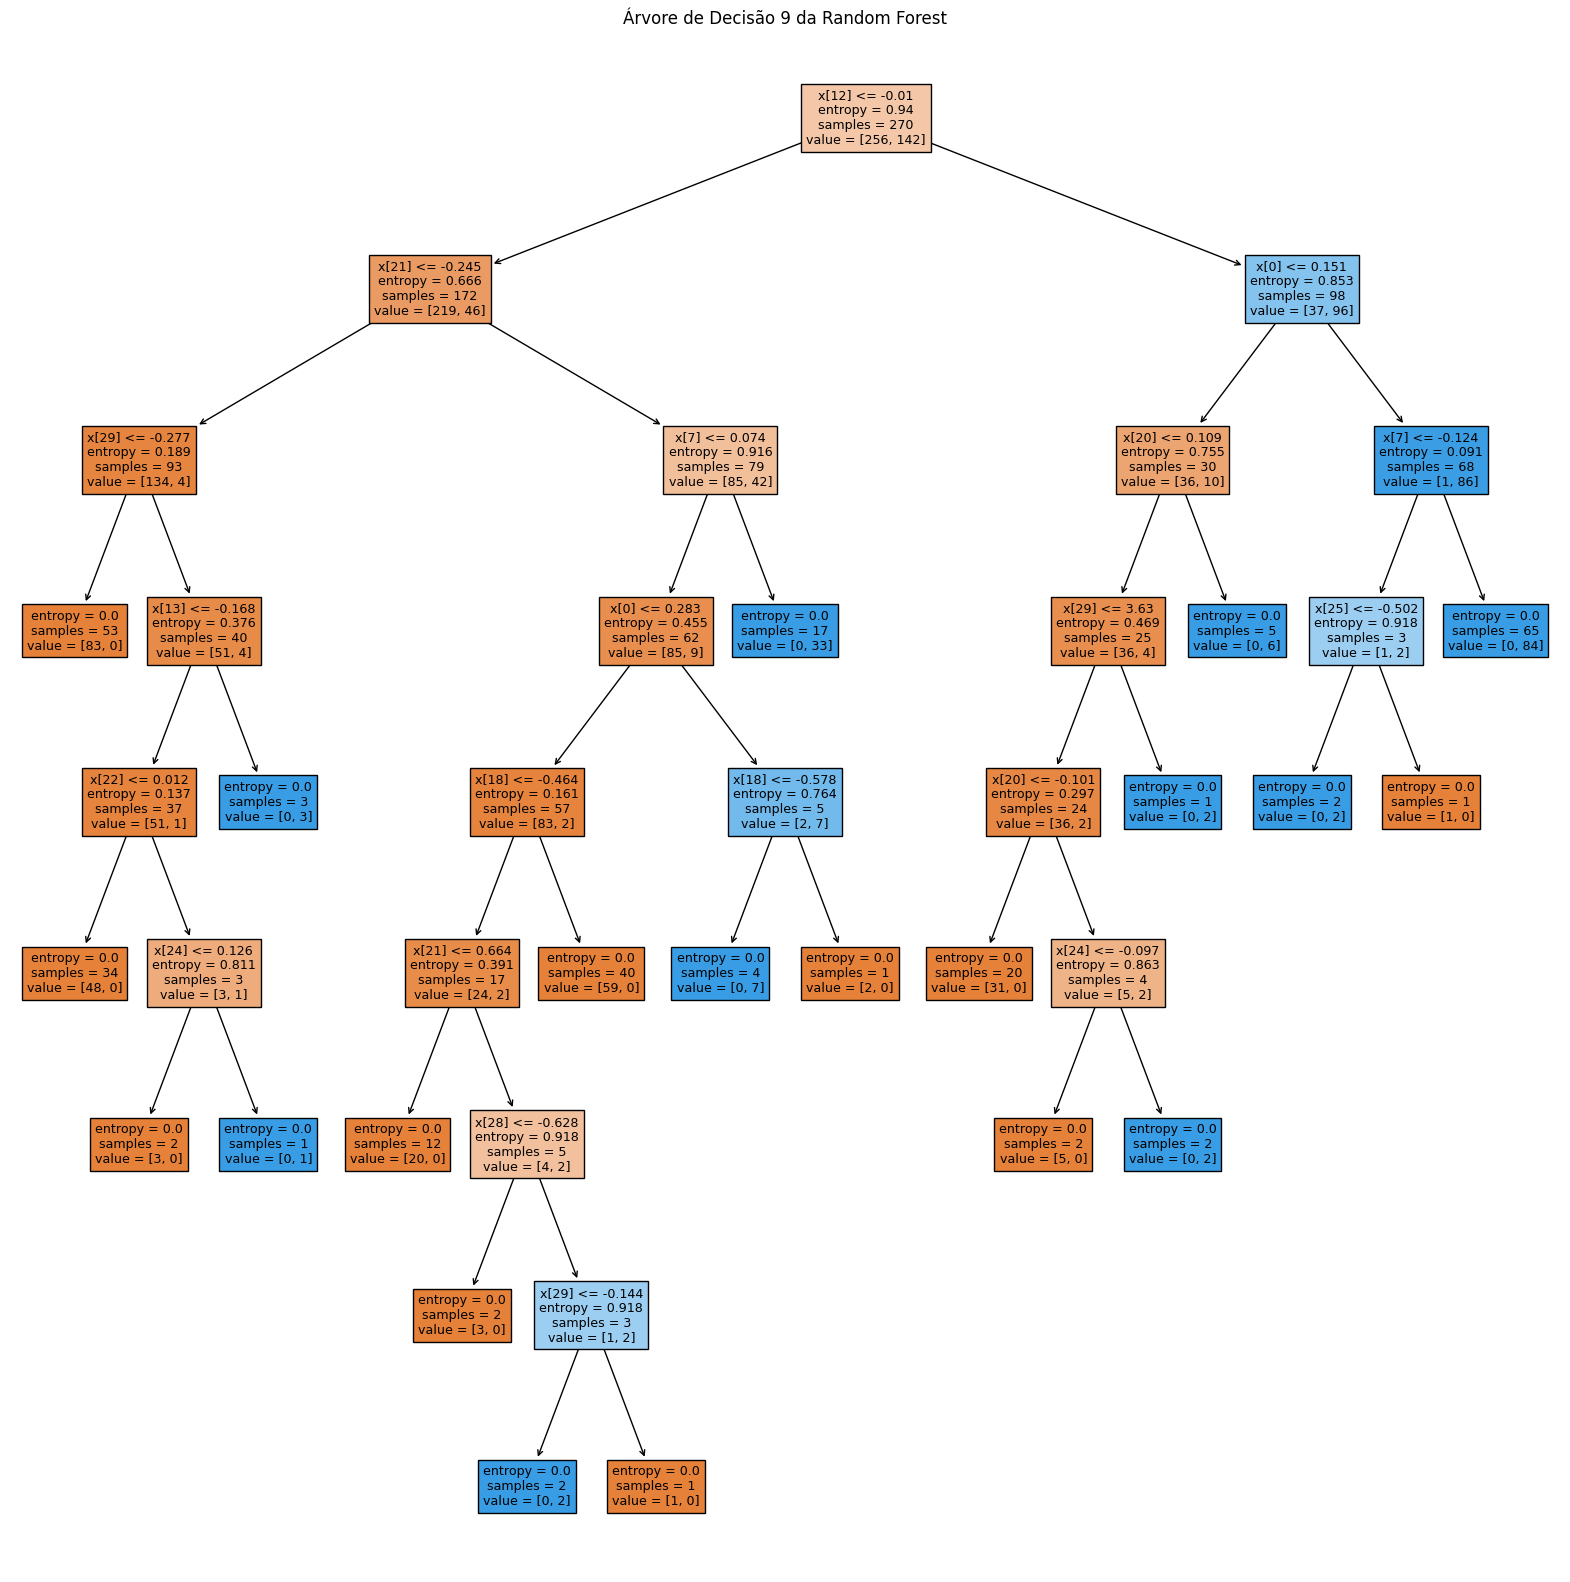

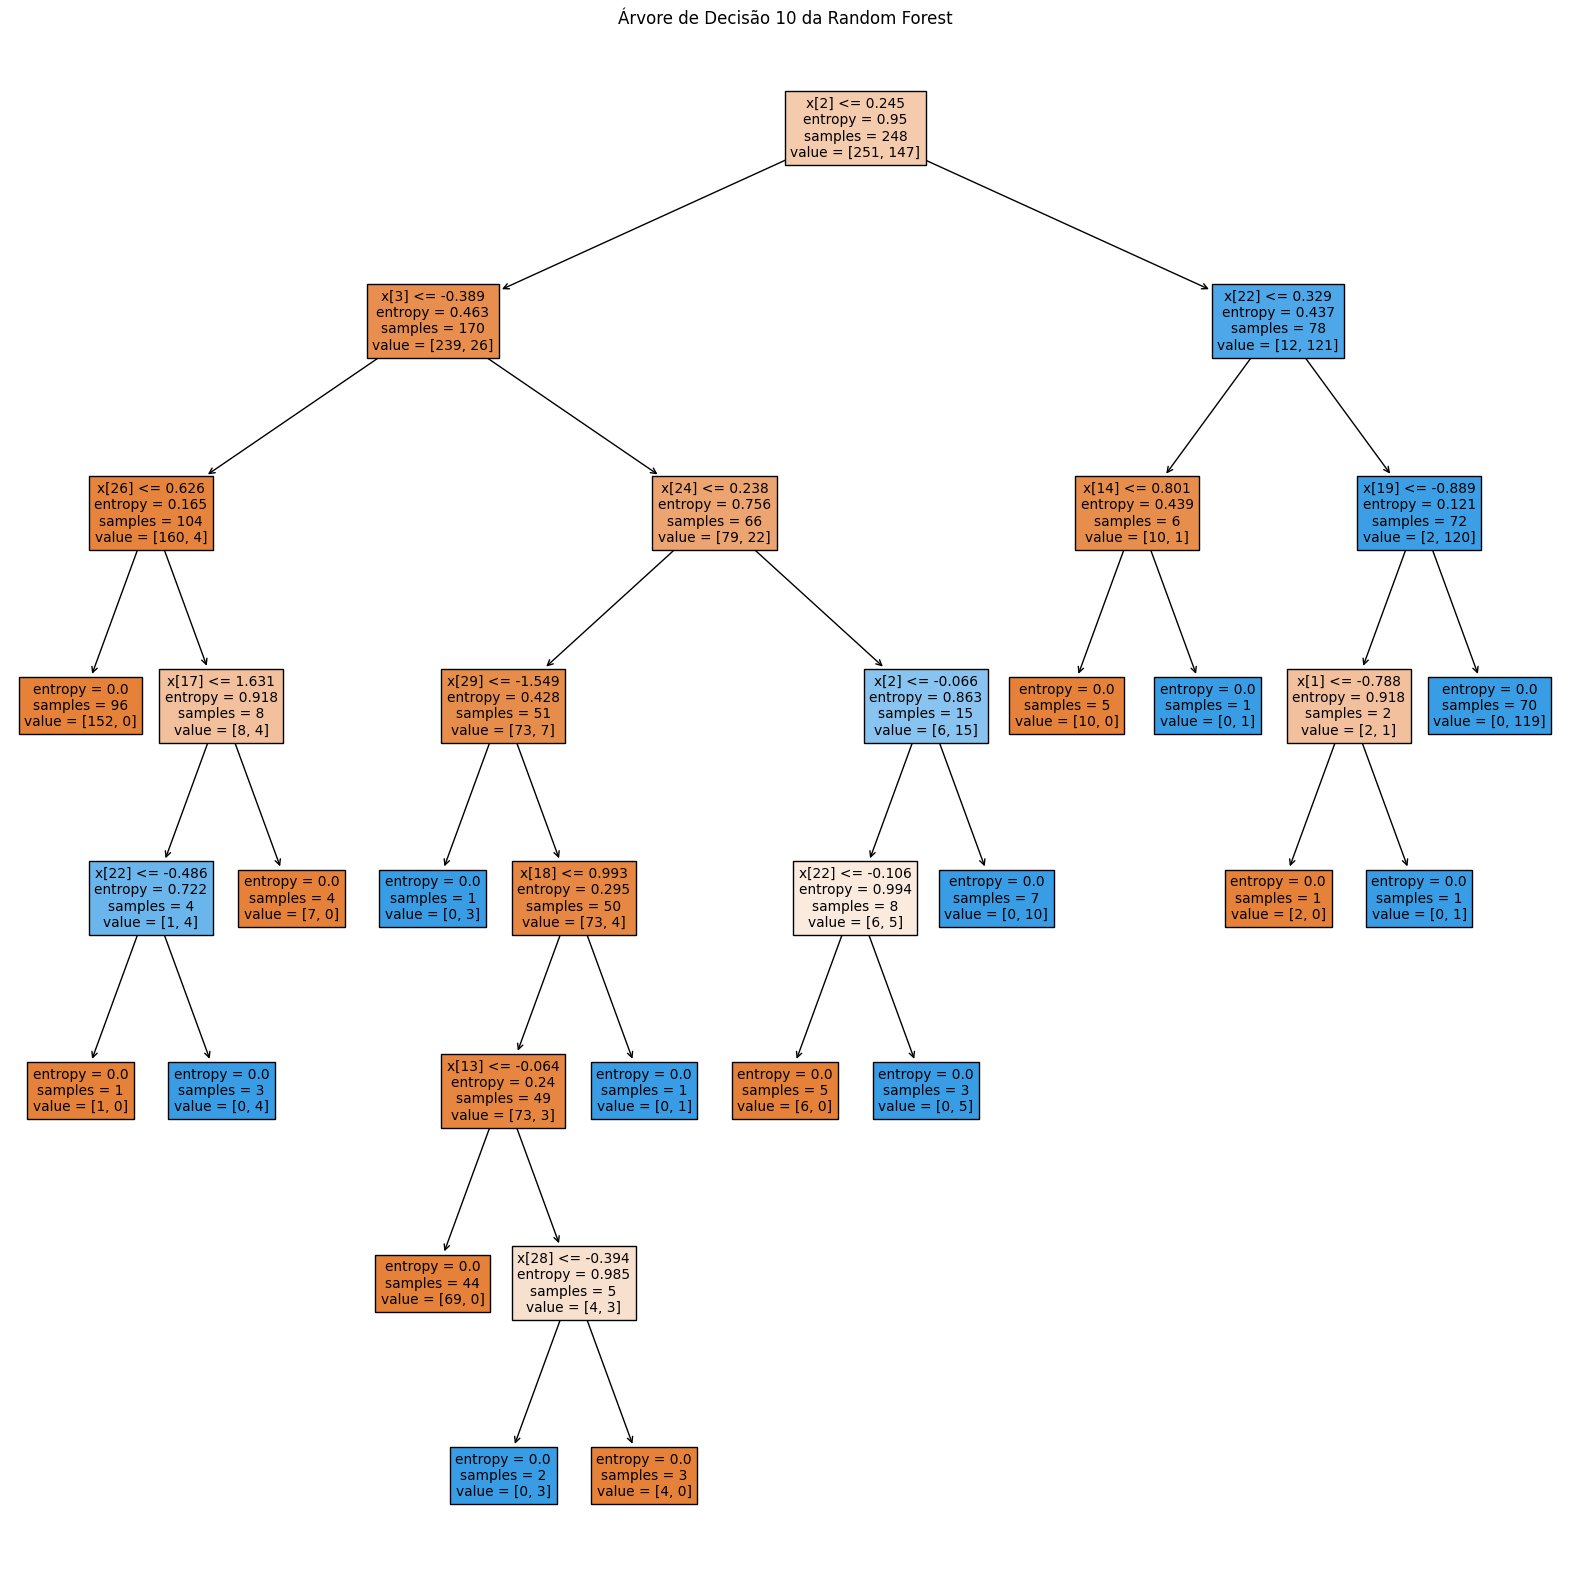

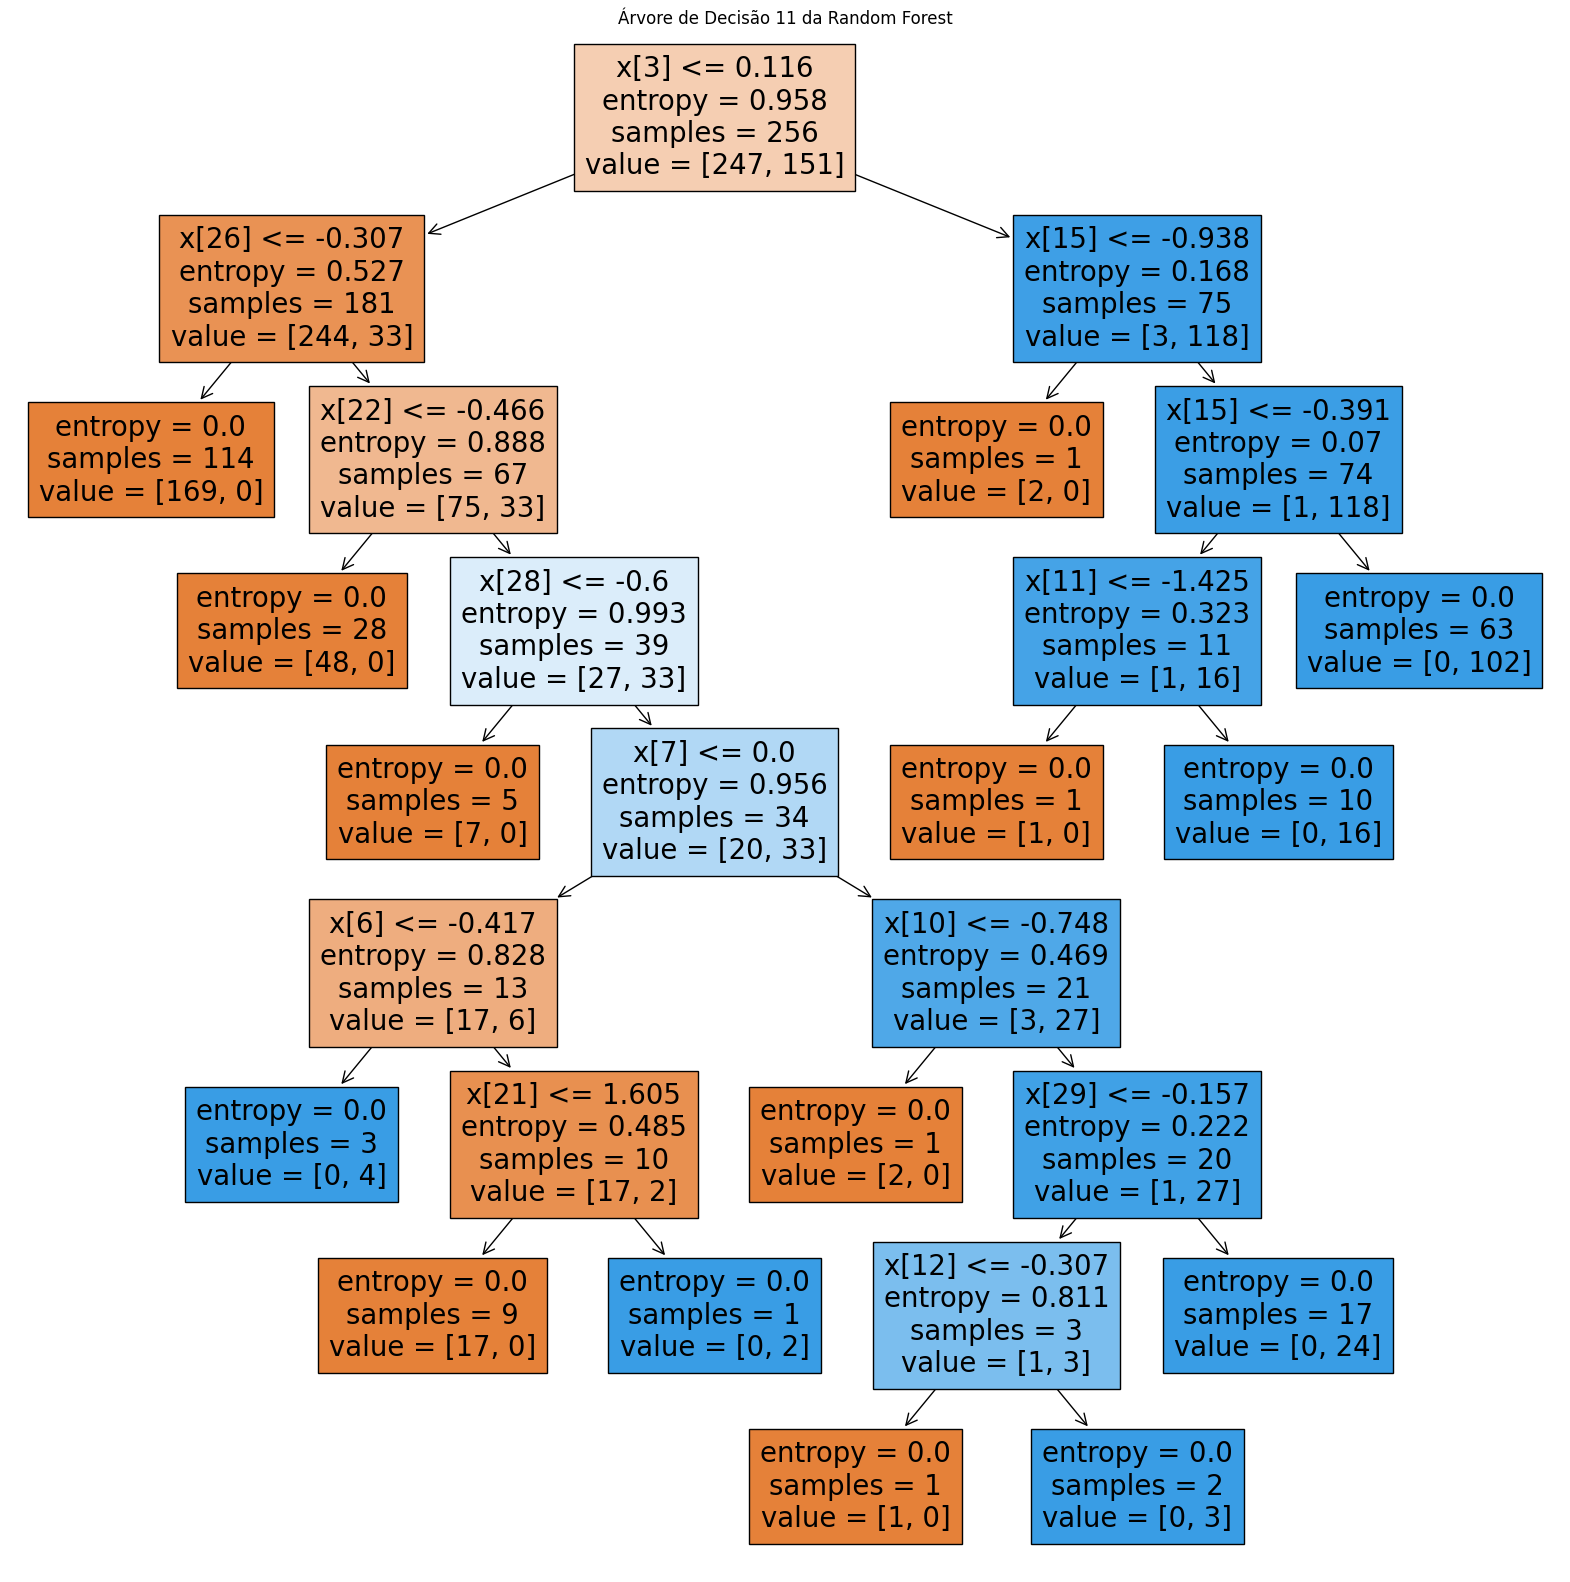

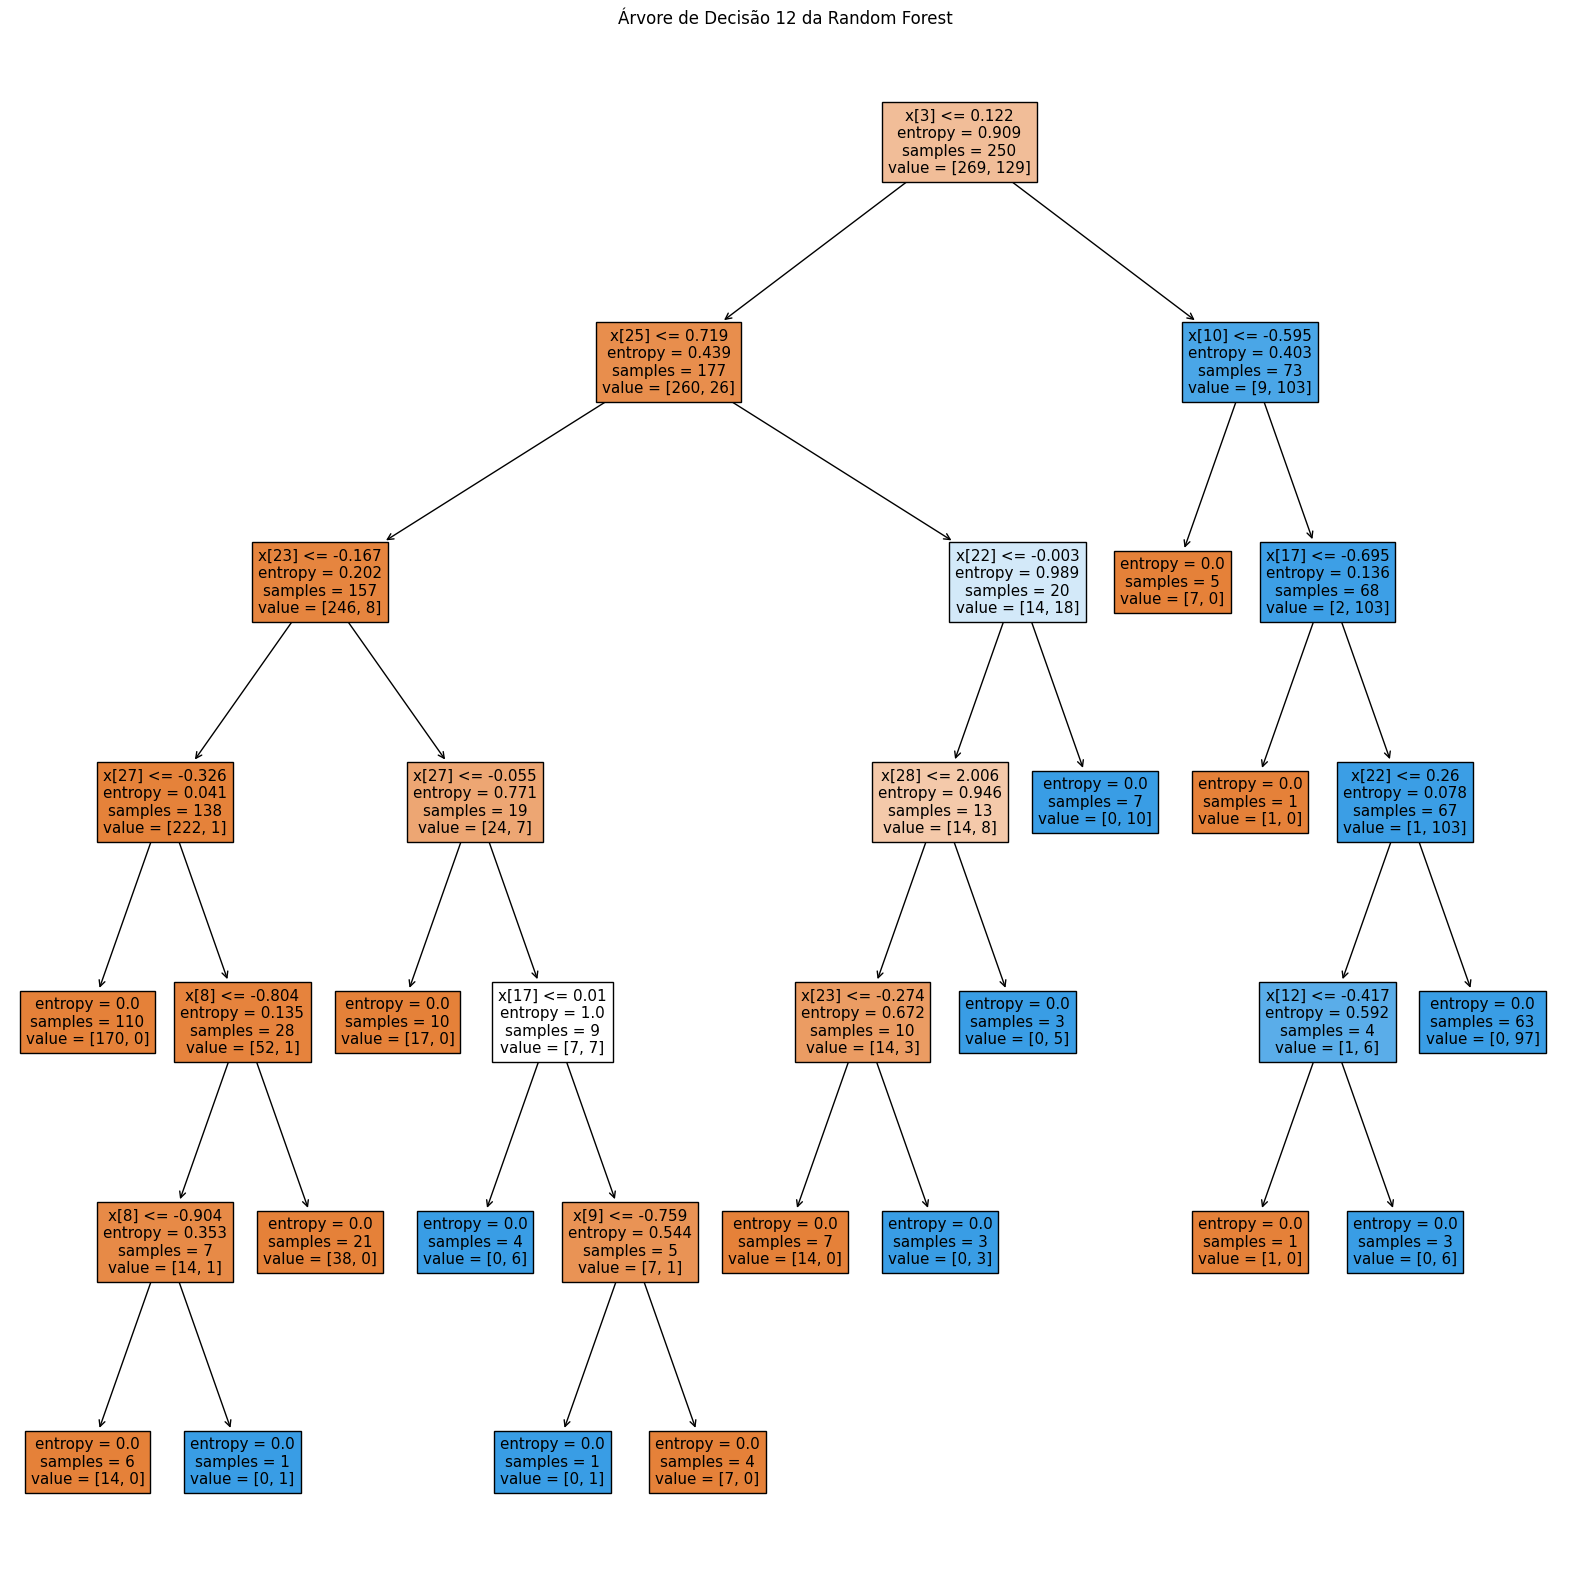

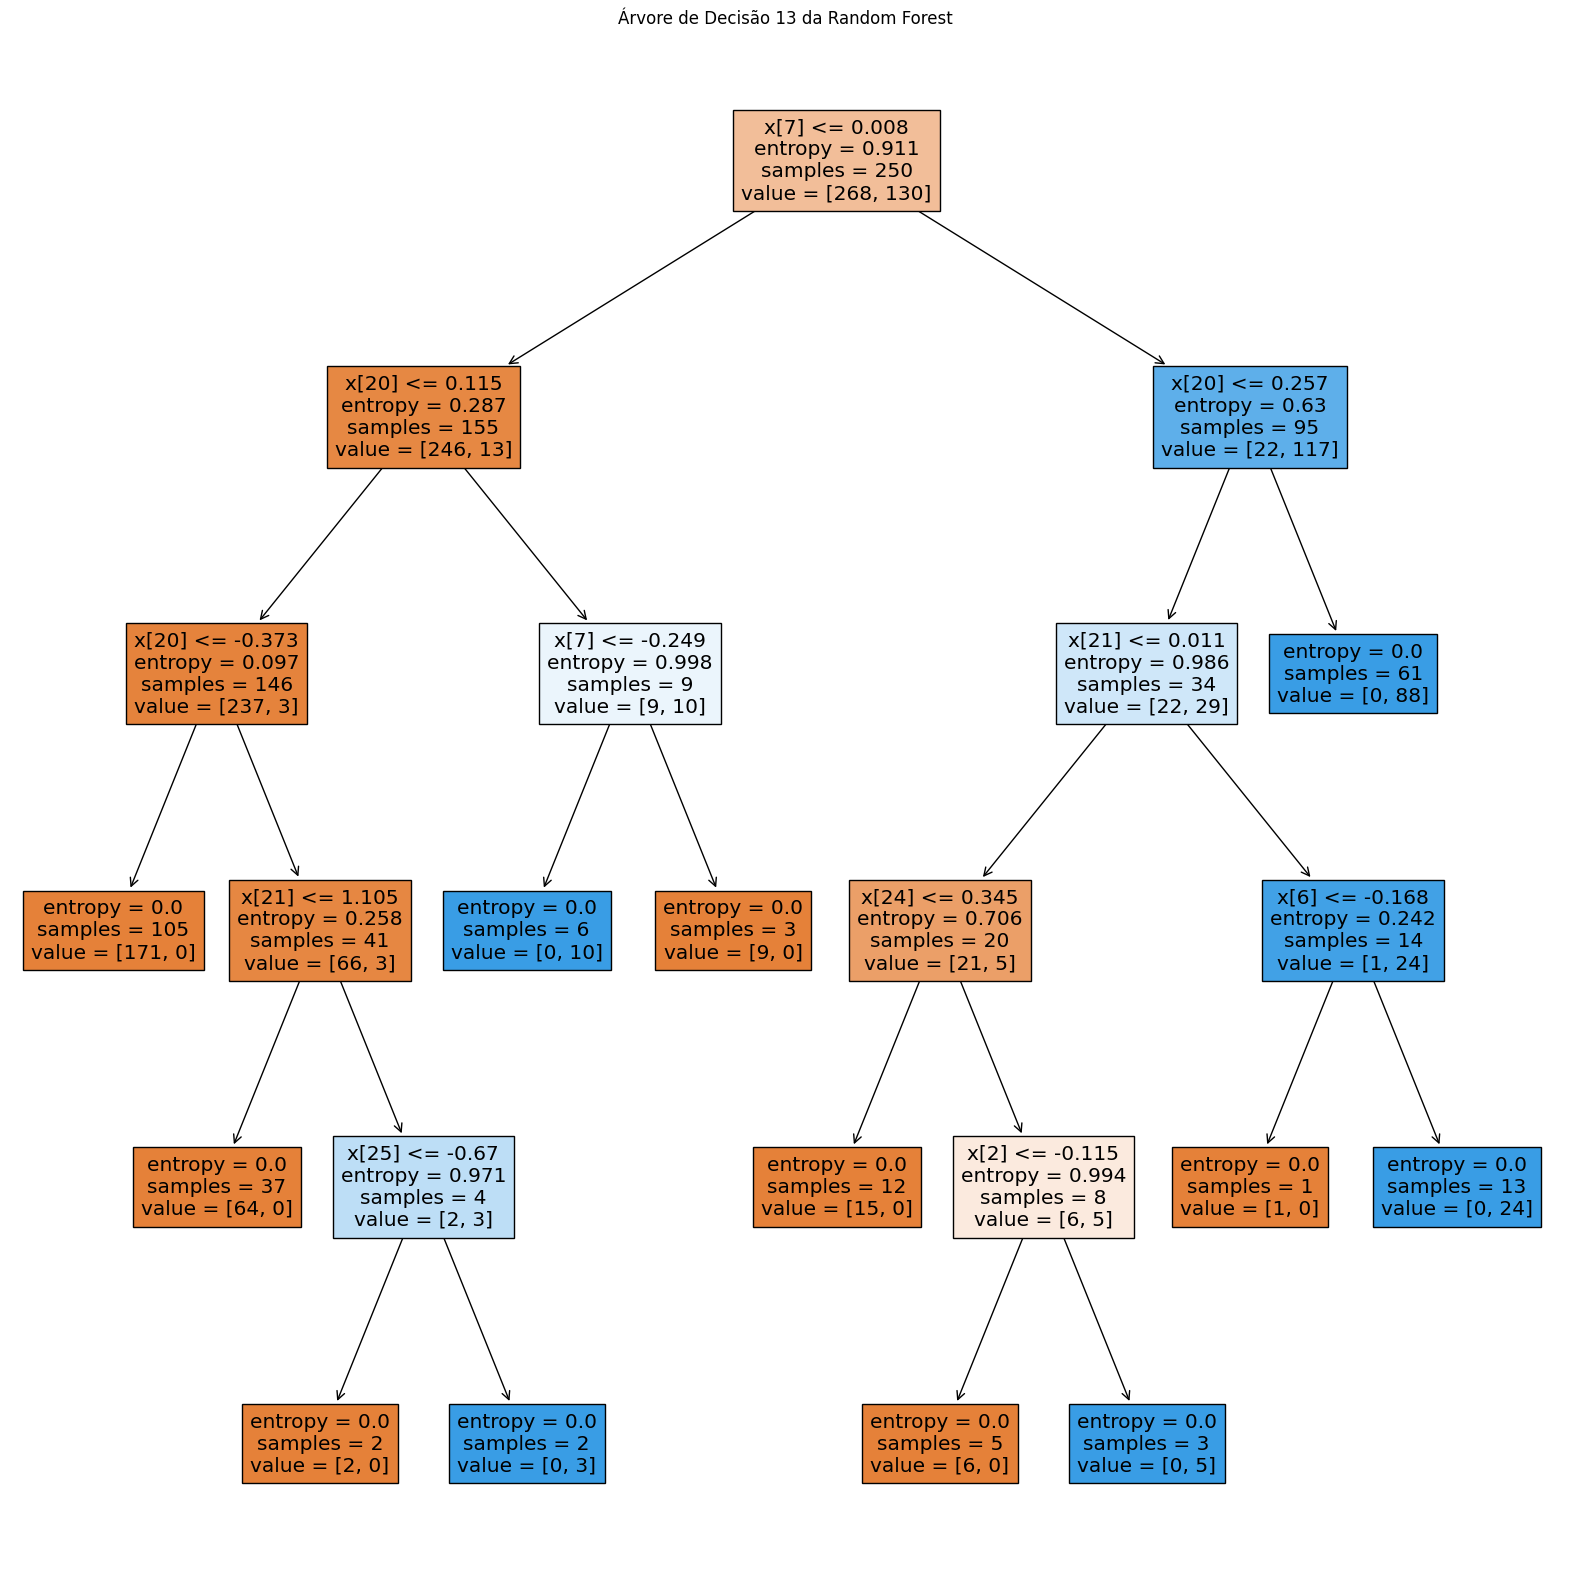

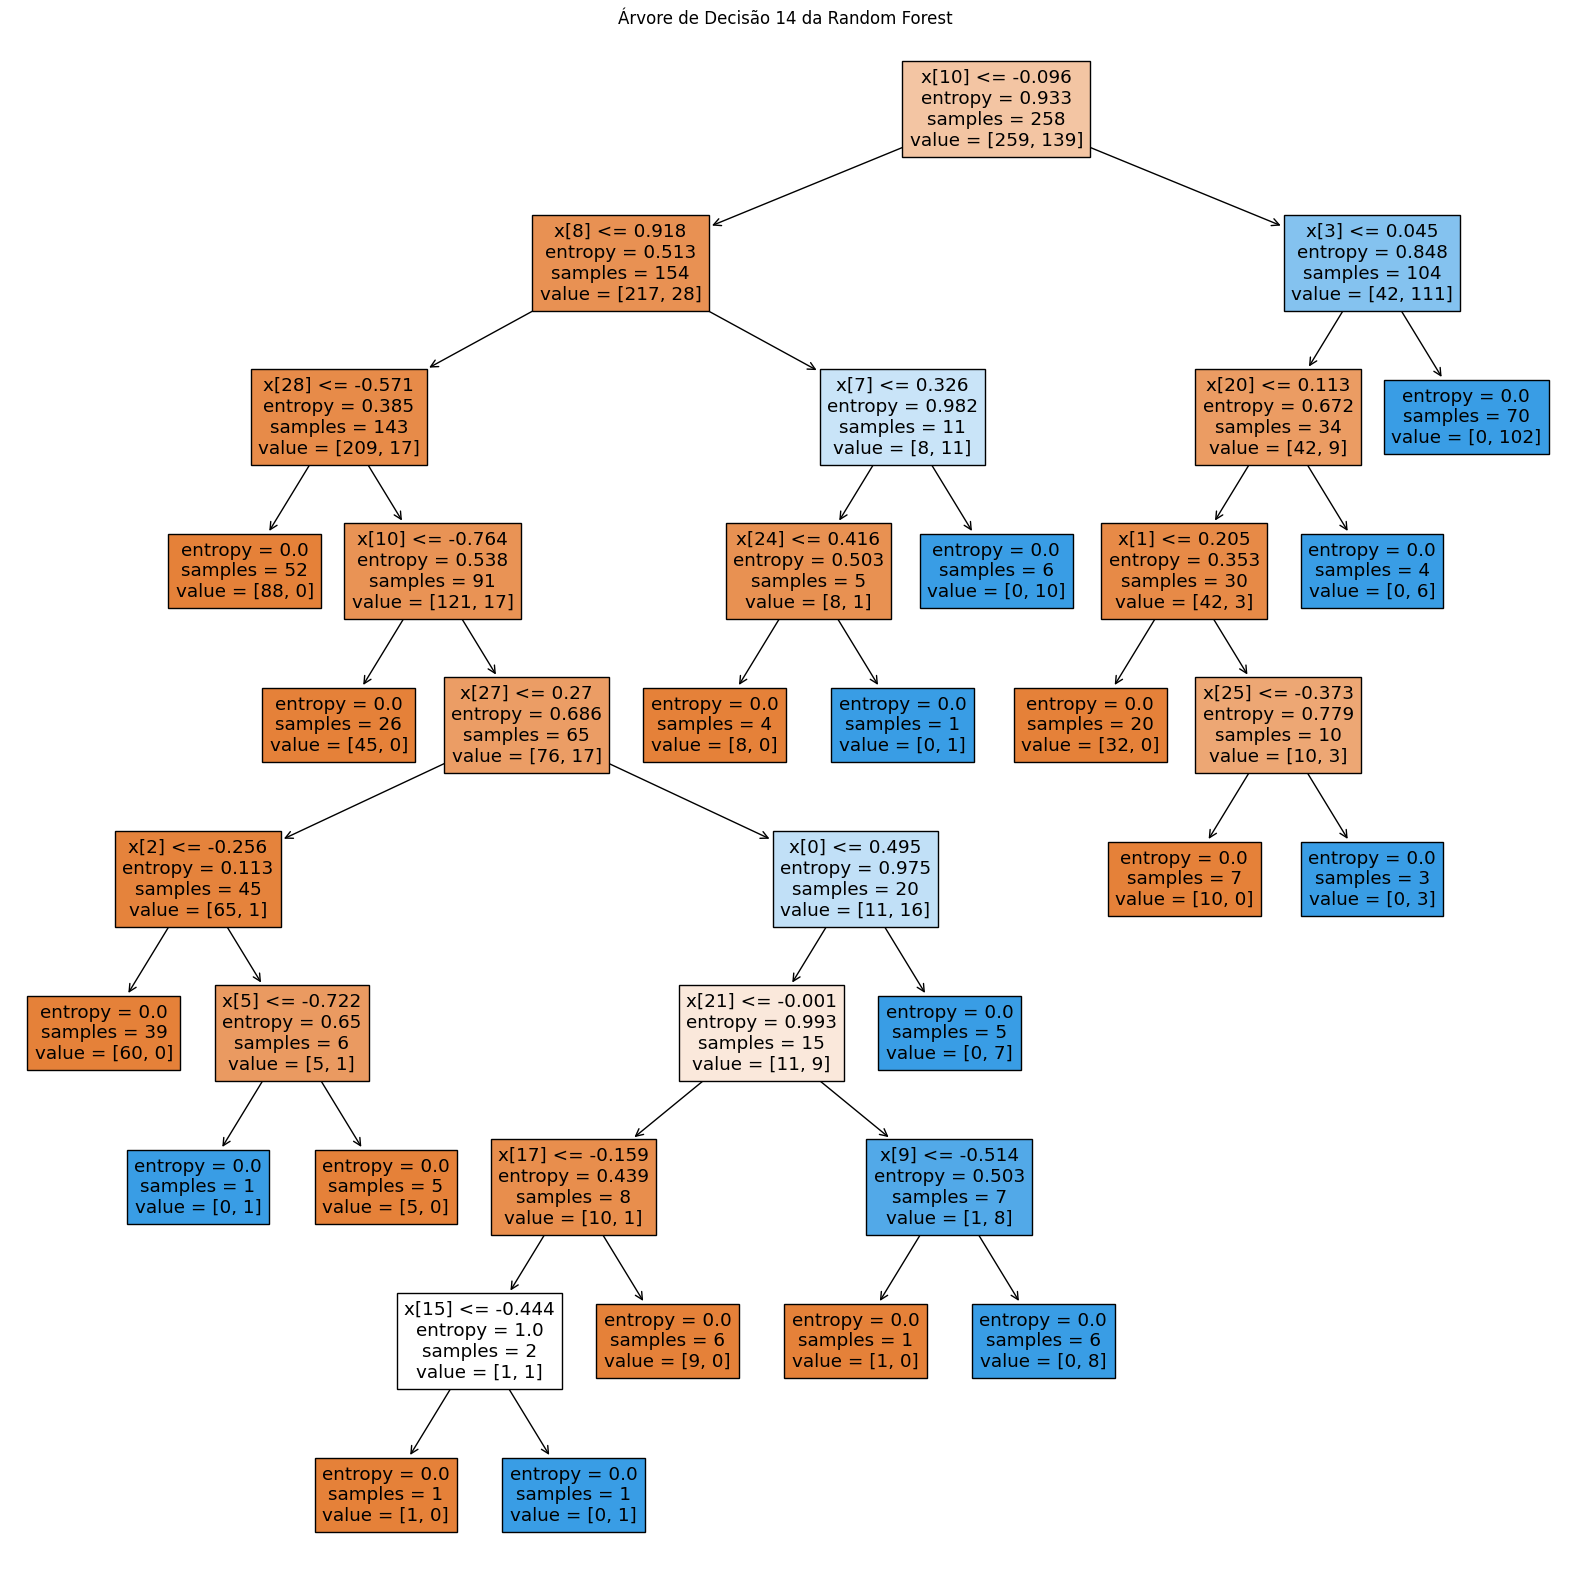

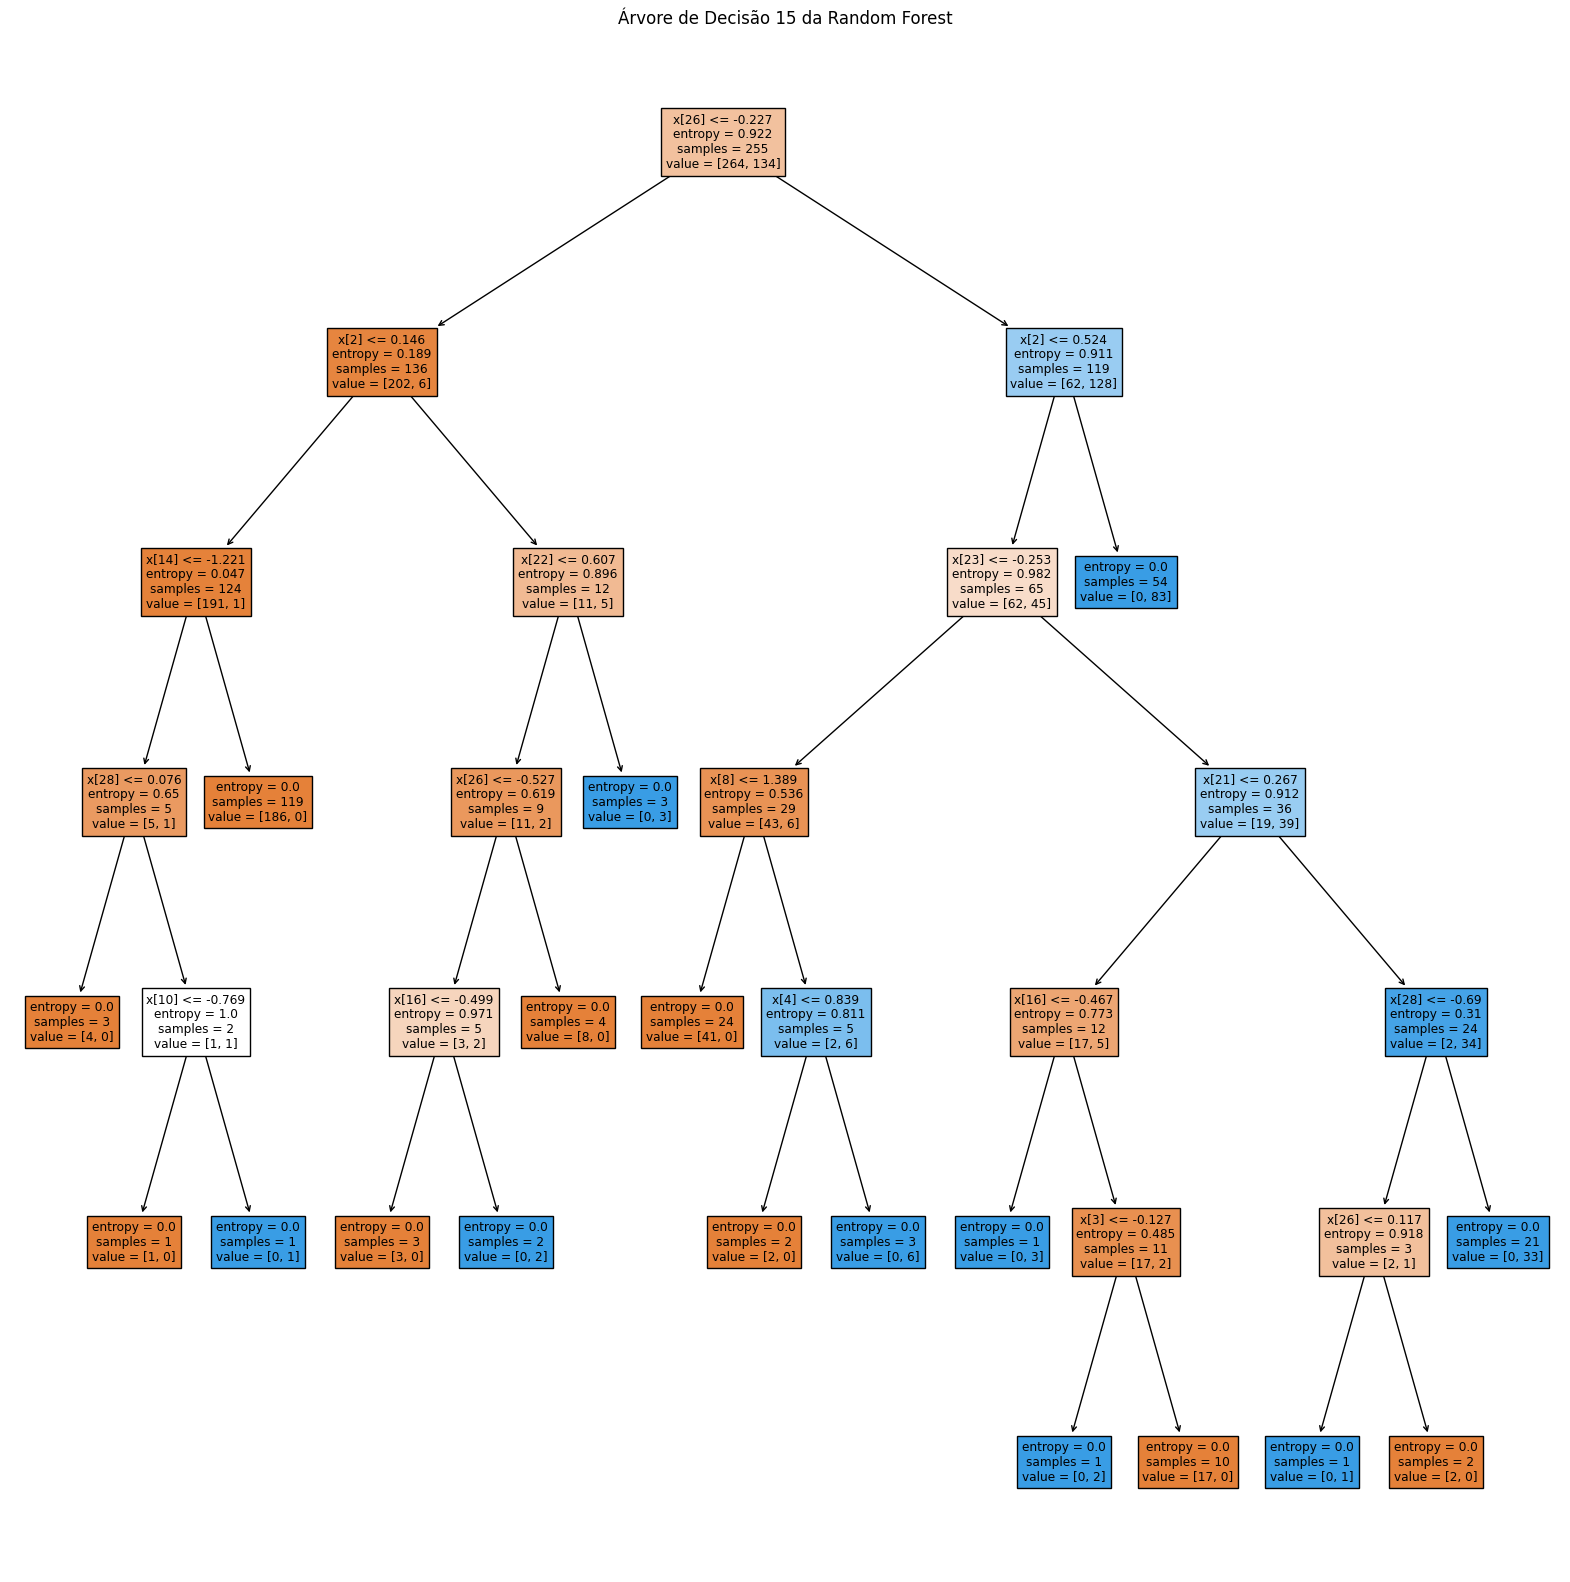

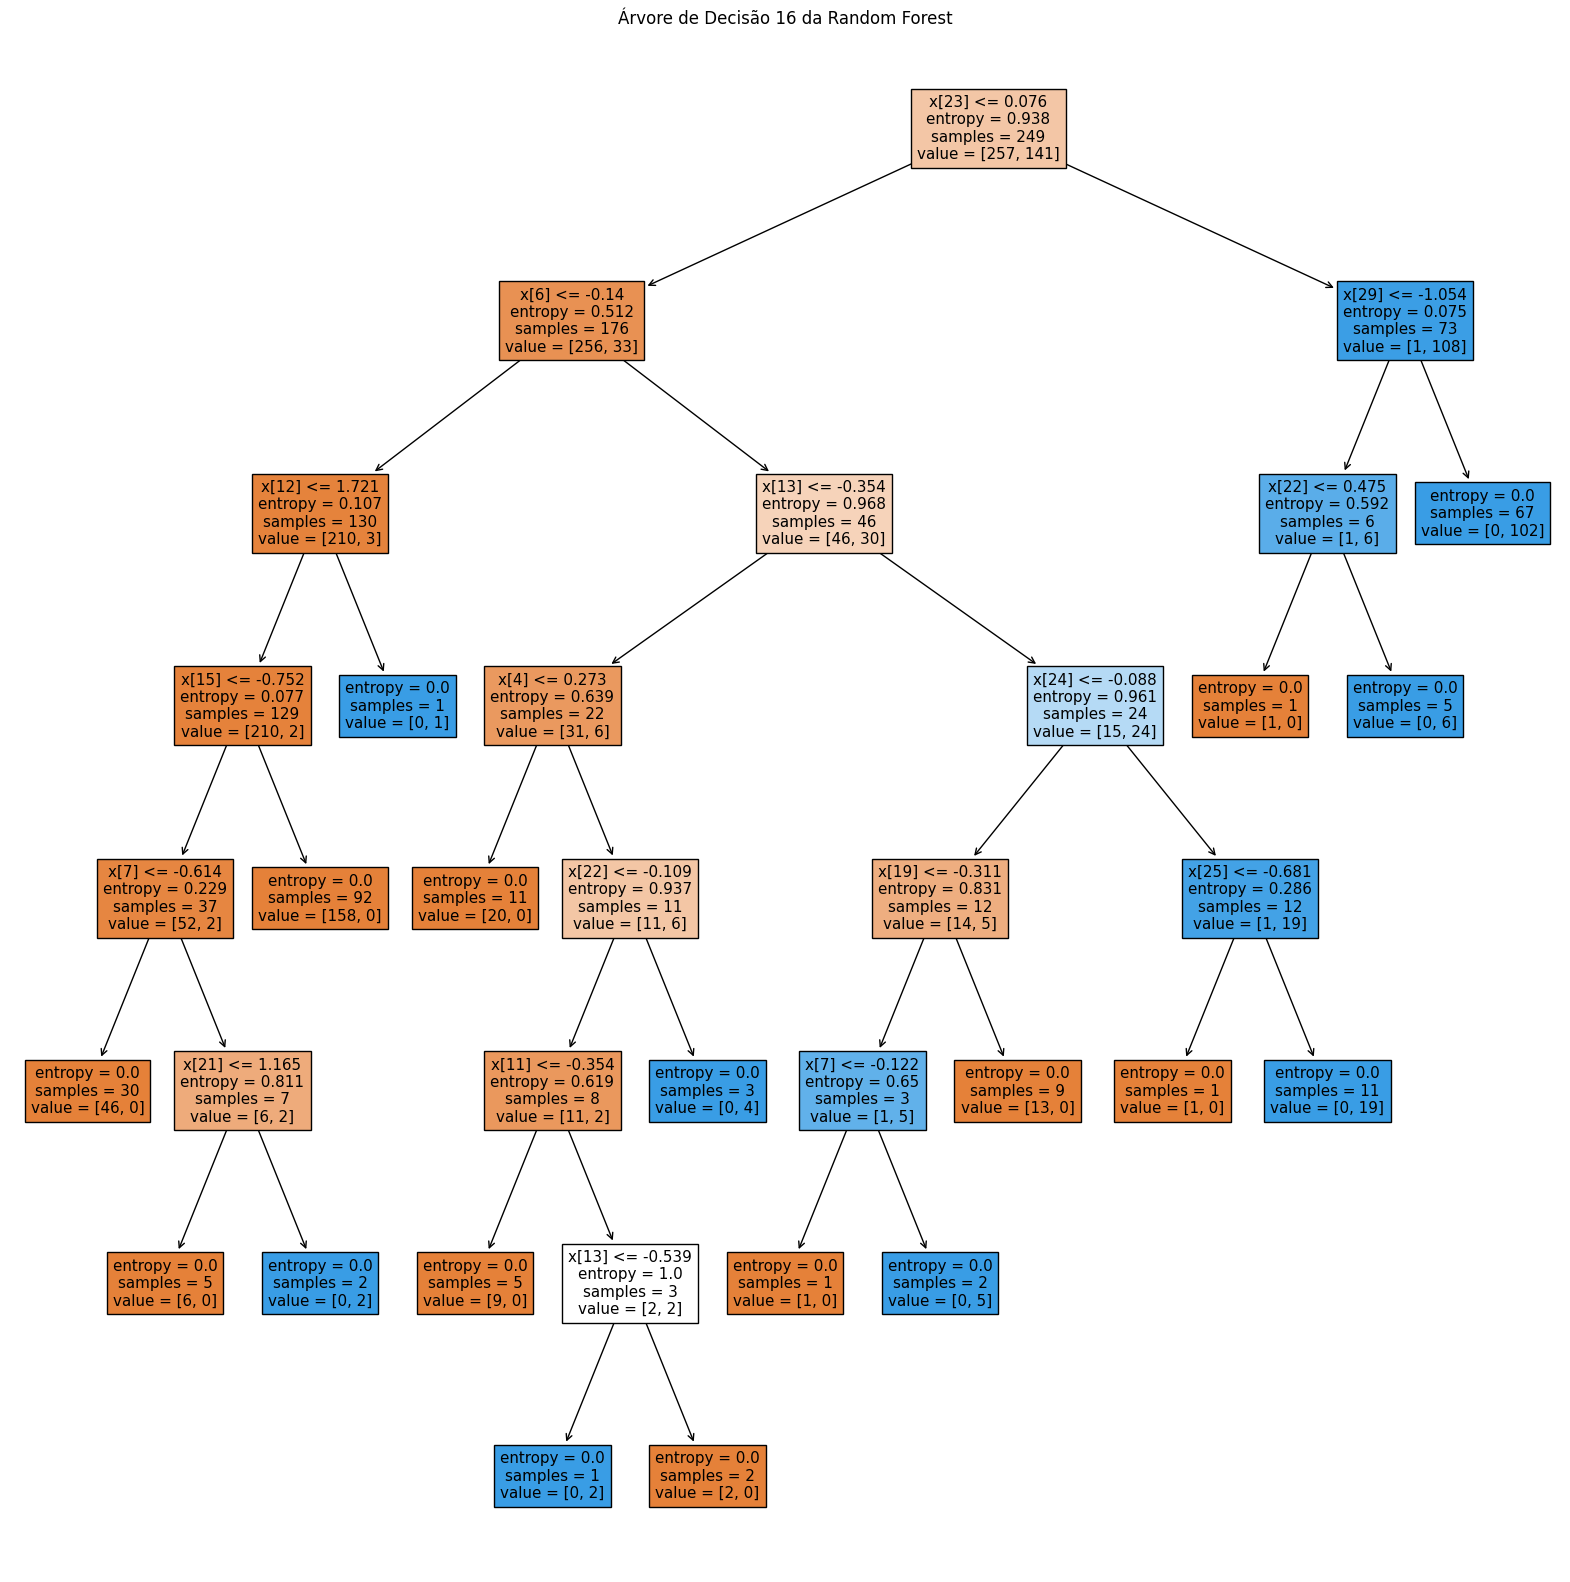

In [13]:
for i, tree in enumerate(best_rf):
    plt.figure(figsize=(20,20))
    plot_tree(tree, filled=True)
    plt.title(f"Árvore de Decisão {i} da Random Forest")
    plt.show()